In [30]:
import warnings
from math import ceil, floor

import numpy as np
import torch
import os

from matplotlib import pyplot as plt
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from torch import nn
from torch.autograd import Variable
from torch.nn import MSELoss
from torch.nn.functional import one_hot
from torch.optim import AdamW
from torch.utils.data import DataLoader

## Declare some consts

In [ ]:
POSITIVE_PARTICLE_CODES: list = [
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    4000001,
    4000002,
    4000011,
    4000012,
    21,
    22,
    23,
    24,
    25,
    32,
    33,
    34,
    35,
    36,
    37,
    1103,
    2101,
    2103,
    2203,
    3101,
    3103,
    3201,
    3203,
    3303,
    4101,
    4103,
    4201,
    4203,
    4301,
    4303,
    4403,
    5101,
    5103,
    5201,
    5203,
    5301,
    5303,
    5401,
    5403,
    5503,
    3000111,
    3000211,
    3000221,
    3100221,
    3000113,
    3000213,
    3000223,
    3100021,
    3060111,
    3160111,
    3130113,
    3140113,
    3150113,
    3160113,
    1000993,
    1009113,
    1009213,
    1009223,
    1009313,
    1009323,
    1009333,
    1091114,
    1092114,
    1092214,
    1092224,
    1093114,
    1093214,
    1093224,
    1093314,
    1093324,
    1093334,
    1000612,
    1000622,
    1000632,
    1000642,
    1000652,
    1006113,
    1006211,
    1006213,
    1006223,
    1006311,
    1006313,
    1006321,
    1006323,
    1006333,
    1000001,
    1000002,
    1000003,
    1000004,
    1000005,
    1000006,
    1000011,
    1000012,
    1000013,
    1000014,
    1000015,
    1000016,
    2000001,
    2000002,
    2000003,
    2000004,
    2000005,
    2000006,
    2000011,
    2000013,
    2000015,
    1000021,
    1000022,
    1000023,
    1000024,
    1000025,
    1000035,
    1000037,
    1000039,
    39,
    41,
    42,
    110,
    990,
    9990,
    111,
    211,
    9000111,
    9000211,
    100111,
    100211,
    10111,
    10211,
    9010111,
    9010211,
    113,
    213,
    10113,
    10213,
    20113,
    20213,
    9000113,
    9000213,
    100113,
    100213,
    9010113,
    9010213,
    9020113,
    9020213,
    30113,
    30213,
    9030113,
    9030213,
    9040113,
    9040213,
    115,
    215,
    10115,
    10215,
    9000115,
    9000215,
    9010115,
    9010215,
    117,
    217,
    9000117,
    9000217,
    9010117,
    9010217,
    119,
    219,
    221,
    331,
    9000221,
    9010221,
    100221,
    10221,
    9020221,
    100331,
    9030221,
    10331,
    9040221,
    9050221,
    9060221,
    9070221,
    9080221,
    223,
    333,
    10223,
    20223,
    10333,
    20333,
    100223,
    9000223,
    9010223,
    30223,
    100333,
    225,
    9000225,
    335,
    9010225,
    9020225,
    10225,
    9030225,
    10335,
    9040225,
    9050225,
    9060225,
    9070225,
    9080225,
    9090225,
    227,
    337,
    229,
    9000229,
    9010229,
    130,
    310,
    311,
    321,
    9000311,
    9000321,
    10311,
    10321,
    100311,
    100321,
    9010311,
    9010321,
    9020311,
    9020321,
    313,
    323,
    10313,
    10323,
    20313,
    20323,
    100313,
    100323,
    9000313,
    9000323,
    30313,
    30323,
    315,
    325,
    9000315,
    9000325,
    10315,
    10325,
    20315,
    20325,
    9010315,
    9010325,
    9020315,
    9020325,
    317,
    327,
    9010317,
    9010327,
    319,
    329,
    9000319,
    9000329,
    411,
    421,
    10411,
    10421,
    413,
    423,
    10413,
    10423,
    20413,
    20423,
    415,
    425,
    431,
    10431,
    433,
    10433,
    20433,
    435,
    511,
    521,
    10511,
    10521,
    513,
    523,
    10513,
    10523,
    20513,
    20523,
    515,
    525,
    531,
    10531,
    533,
    10533,
    20533,
    535,
    541,
    10541,
    543,
    10543,
    20543,
    545,
    441,
    10441,
    100441,
    443,
    10443,
    20443,
    100443,
    30443,
    9000443,
    9010443,
    9020443,
    445,
    100445,
    551,
    10551,
    100551,
    110551,
    200551,
    210551,
    553,
    10553,
    20553,
    30553,
    100553,
    110553,
    120553,
    130553,
    200553,
    210553,
    220553,
    300553,
    9000553,
    9010553,
    555,
    10555,
    20555,
    100555,
    110555,
    120555,
    200555,
    557,
    100557,
    2212,
    2112,
    2224,
    2214,
    2114,
    1114,
    3122,
    3222,
    3212,
    3112,
    3224,
    3214,
    3114,
    3322,
    3312,
    3324,
    3314,
    3334,
    4122,
    4222,
    4212,
    4112,
    4224,
    4214,
    4114,
    4232,
    4132,
    4322,
    4312,
    4324,
    4314,
    4332,
    4334,
    4412,
    4422,
    4414,
    4424,
    4432,
    4434,
    4444,
    9221132,
    9331122,
    5122,
    5112,
    5212,
    5222,
    5114,
    5214,
    5224,
    5132,
    5232,
    5312,
    5322,
    5314,
    5324,
    5332,
    5334,
    5142,
    5242,
    5412,
    5422,
    5414,
    5424,
    5342,
    5432,
    5434,
    5442,
    5444,
    5512,
    5522,
    5514,
    5524,
    5532,
    5534,
    5542,
    5544,
    5554,
]
N_PARTICLES = 2 * len(POSITIVE_PARTICLE_CODES)
ALL_PARTICLE_CODES = -1*POSITIVE_PARTICLE_CODES + POSITIVE_PARTICLE_CODES + [-999]  # -999 is used for padding
ALL_PARTICLE_INDICES = list(range(len(ALL_PARTICLE_CODES)))

PARTICLE_EMB_DIM = 48

PDG_EMB_CNT = 456
STAT_CODE_EMB_CNT = 2
STAT_CODE_EMB_DIM = 1

CONT_FEATURES = 10
CAT_FEATURES = 2
EMB_FEATURES = CONT_FEATURES + PARTICLE_EMB_DIM + STAT_CODE_EMB_DIM
FEATURES = CONT_FEATURES + CAT_FEATURES

PRTCL_LATENT_SPACE_SIZE = 20

## Preprocess or load preprocessed data

In [ ]:
DATA_PATH = 'data/particle_data.data'
RAW_DATA_PATH = 'data/raw_data'


def sgnlog(val: float) -> float:
    sgn = 1 if val > 0 else -1
    logval = np.log((val * sgn) + 1)
    return float(logval * sgn)


def load_data() -> torch.Tensor:
    if os.exists(DATA_PATH):
        return torch.load(DATA_PATH)

    file = open(RAW_DATA_PATH, 'r')
    lines = file.readlines()

    event_list_cat: list[torch.Tensor] = []
    event_list_cont: list[torch.Tensor] = []

    event_cat = []
    event_cont = []

    max_length = 0

    for idx in range(len(lines)):

        if idx % 50_000 == 0:
            print(str(100 * idx / len(lines)) + '%')

        line = lines[idx].replace('\n', '')

        if len(line) == 0:
            event_list_cat.append(torch.tensor(event_cat))
            event_list_cont.append(torch.tensor(event_cont))

            if max_length < len(event_list_cat):
                max_length = len(event_list_cat)

            event_cat = []
            event_cont = []

            if idx > len(lines) / 20:
                break

            continue

        particle_params_cat = []
        particle_params_cont = []

        for param_idx, param in enumerate(line.split(' ')):

            if len(param) == 0:
                continue

            if param_idx == 0:  # PDG
                particle_params_cat.append(ALL_PARTICLE_CODES.index(int(param)))
            elif param_idx == 1:
                particle_params_cat.append(int(param))  # STATUS CODE - 1 or 0.
            # elif param_idx == 2:  # MOTHER 1
            #    particle_params_cat.append(int(param))
            # elif param_idx == 3:  # MOTHER 2
            #    particle_params_cat.append(int(param))
            # elif param_idx == 4:  # DAUGHTER 1
            #    particle_params_cat.append(int(param))
            # elif param_idx == 5:  # DAUGHTER 2
            #    particle_params_cat.append(int(param))
            elif param_idx == 6:  # WEIGHT
                particle_params_cont.append(sgnlog(float(param)))
            elif param_idx == 7:  # PX
                particle_params_cont.append(sgnlog(float(param)))
            elif param_idx == 8:  # PY
                particle_params_cont.append(sgnlog(float(param)))
            elif param_idx == 9:  # PZ
                particle_params_cont.append(sgnlog(float(param)))
            elif param_idx == 10:  # Energy
                particle_params_cont.append(sgnlog(float(param)))
            elif param_idx == 11:  # Vx
                particle_params_cont.append(sgnlog(float(param)))
            elif param_idx == 12:  # Vy
                particle_params_cont.append(sgnlog(float(param)))
            elif param_idx == 13:  # Vz
                particle_params_cont.append(sgnlog(float(param)))
            elif param_idx == 14:  # Polar Theta
                particle_params_cont.append(sgnlog(float(param)))
            elif param_idx == 15:  # Polar Phi
                particle_params_cont.append(sgnlog(float(param)))

        event_cont.append(particle_params_cont)
        event_cat.append(particle_params_cat)

    data_cat = event_list_cat
    data_cont = event_list_cont

    data = []

    for idx_e in range(len(data_cat)):
        for idx_p in range(len(data_cat[idx_e])):
            prtc_cat = data_cat[idx_e][idx_p].float()
            prtc_cont = data_cont[idx_e][idx_p].float()
            prtc = torch.cat([prtc_cat, prtc_cont], dim=0)
            data.append(prtc.unsqueeze(dim=0))

    data = torch.cat(data)

    torch.save(data, DATA_PATH)

    return data

X = load_data()
X_train, X_test = train_test_split(X, test_size=.1)

## Common models and functions for all models

In [31]:
dtype = torch.float32
PRTCL_LATENT_SPACE_SIZE = 12


if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

class PDGEmbedder(nn.Module):
    def __init__(self, pdg_count: int, pdg_embed_dim: int):
        super(PDGEmbedder, self).__init__()

        self.pdg_count = pdg_count
        self.net = nn.Sequential(
            nn.Linear(pdg_count, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 256),
            nn.Tanh(),
            nn.Linear(256, pdg_embed_dim),
            nn.Tanh(),
        )

    def forward(self, x: torch.Tensor):
        onehot = one_hot(x, self.pdg_count).to(dtype=self.net[0].weight.dtype)
        return self.net(onehot)

    def forward_onehot(self, x_onehot: torch.Tensor):
        return self.net(x_onehot)

class PDGDeembedder(nn.Module):

    def __init__(self, pdg_embed_dim: int, pdg_count: int):
        super(PDGDeembedder, self).__init__()

        self.pdg_embed_dim = pdg_embed_dim
        self.pdg_count = pdg_count

        self.net = nn.Sequential(
            nn.Linear(pdg_embed_dim, 256),
            nn.Tanh(),
            nn.Linear(256, 512),
            nn.Tanh(),
            nn.Linear(512, 1024),
            nn.Tanh(),
            nn.Linear(1024, pdg_count),
            nn.Tanh()
        )

    def forward(self, x: torch.Tensor):
        out = self.net(x)
        return out

    # x is of size EMB_FEATURES
    def deemb(self, x: torch.Tensor):

        pdg_embed: torch.Tensor = torch.Tensor()
        other: torch.Tensor = torch.Tensor()

        if len(x.size()) == 2:
            pdg_embed = x[:, :self.pdg_embed_dim]
            other = x[:, self.pdg_embed_dim:]
        elif len(x.size()) == 3:
            pdg_embed = x[:, :, :self.pdg_embed_dim]
            other = x[:, :, self.pdg_embed_dim:]

        pdg_one_hot = self.forward(pdg_embed)

        if len(x.size()) == 2:
            vals = torch.argmax(pdg_one_hot, dim=1).unsqueeze(dim=1).float()
            return torch.cat([vals, other], dim=1)
        elif len(x.size()) == 3:
            vals = torch.argmax(pdg_one_hot, dim=2).unsqueeze(dim=2).float()
            return torch.cat([vals, other], dim=2)

embedder = PDGEmbedder(pdg_count=N_PARTICLES, pdg_embed_dim=PARTICLE_EMB_DIM).to(dtype=dtype, device=device)
deembedder = PDGDeembedder(pdg_embed_dim=PARTICLE_EMB_DIM, pdg_count=N_PARTICLES).to(dtype=dtype, device=device)

GPU is available


In [32]:
def embed_data(data):
    categorical_data = data[:, :2]
    continous_data = data[:, 2:]

    pdg = categorical_data[:, 0].long()
    emb_particle_code = embedder(pdg).squeeze()

    particle_status_code = categorical_data[:, 1].unsqueeze(dim=1)

    return torch.cat([emb_particle_code, particle_status_code, continous_data], dim=1).to(dtype=dtype)


def train_deembeder(epochs: int) -> float:

    deembed_optimizer = AdamW(deembedder.parameters(), lr=1e-4)
    deemb_loss = MSELoss()

    real_one_hot: torch.Tensor = one_hot(torch.arange(N_PARTICLES, device=device), num_classes=N_PARTICLES).to(dtype)

    for param in embedder.parameters():
        param.requires_grad = False

    gen_one_hot = None
    for _ in range(epochs):
        deembed_optimizer.zero_grad()
        gen_one_hot = deembedder(embedder.forward_onehot(real_one_hot))
        loss = deemb_loss(real_one_hot, gen_one_hot)
        loss.backward()
        deembed_optimizer.step()

    gen_one_hot = (gen_one_hot > .5).int()
    acc = accuracy_score(real_one_hot.cpu().numpy(), gen_one_hot.cpu().numpy())

    for param in embedder.parameters():
        param.requires_grad = True

    return acc


def print_deemb_quality(real_labels: torch.Tensor):
    gen_onehot = deembedder(embedder(real_labels))
    gen_labels = torch.argmax(gen_onehot, dim=0)

    n_accurate = torch.eq(real_labels, gen_labels).sum(dim=0).item()

    print(f'Deembeder acc: {n_accurate}/{N_PARTICLES}')


def show_heatmaps(
    real_data: torch.Tensor,
    gen_data: torch.Tensor,
    log: bool = False,
):
    # Limit the samples only to the last 50.
    real_data = real_data[:30, :].detach().cpu()
    gen_data = gen_data[:30, :].detach().cpu()
    
    if log:
        real_data = real_data.log()
        gen_data = gen_data.log()

    data = torch.cat(
        tensors=[
            real_data, 
            -2 * torch.ones(size=(5, real_data.shape[1])), # This is just to separate real data from generated one in the plot.
            gen_data
        ],
    )

    plt.title('Top: real data\nBottom: generated data')
    plt.imshow(data, cmap='hot', interpolation='nearest', vmin=-1, vmax=5)
    plt.colorbar()

    plt.show()


def generate_data(n_samples, generator):
    rand_input = torch.randn(size=(n_samples, PRTCL_LATENT_SPACE_SIZE), dtype=dtype, device=device)
    generated_data = generator(rand_input).detach()
    return generated_data


def gen_show_comp_hists(
        model,
        all_real_data,
        attr_idxs: list,
        emb: True,
        sample_cnt=10_000,
        bin_cnt: int = 100,
        hist_range: tuple = (-2, 2),
) -> tuple[float, float]:

    gen_data = generate_data(sample_cnt, model)
    if gen_data is tuple:
        gen_data = torch.cat(gen_data, dim=1).detach()

    real_data = all_real_data[:sample_cnt, :]
    if emb:
        real_data = embed_data(real_data)
    else:
        gen_data = deembedder.deemb(gen_data)

    fig, subplots = plt.subplots(nrows=ceil(len(attr_idxs) / 2), ncols=2, sharex='all')

    fig.subplots_adjust(wspace=.35, hspace=.35, top=.8, bottom=.17)
    fig.suptitle("Real and generated datas' attributes histogram comparison", size=14)

    err_kld = 0
    err_wass = 0

    subplot_handlers = []

    for i, attr_idx in enumerate(attr_idxs):
        _real_data = real_data[:, attr_idx].flatten().cpu()
        _gen_data = gen_data[:, attr_idx].flatten().cpu()

        subplots[floor(i / 2)][i % 2].set_title(f'Attribute: {attr_idx}')
        handler = subplots[floor(i / 2)][i % 2].hist(
            [_real_data, _gen_data],
            range=hist_range,
            stacked=False,
            bins=bin_cnt,
            histtype='stepfilled',
            label=['real data', 'synthetic data'],
            color=['blue', 'red'],
            alpha=0.5,
        )

        subplot_handlers.append(handler)

        # KL_DIV
        min_val = min(min(_real_data), min(_gen_data))
        max_val = max(max(_real_data), max(_gen_data))

        steps = np.linspace(start=min_val, stop=max_val, num=bin_cnt)

        real_data_hist, _ = np.histogram(
            _real_data,
            bins=steps
        )

        gen_data_hist, _ = np.histogram(
            _gen_data,
            bins=steps
        )

        real_log = np.log(real_data_hist + 1)
        gen_log = np.log(gen_data_hist + 1)
        diff_log = abs(real_log - gen_log)
        err_kld += sum(real_data_hist * diff_log + gen_data_hist * diff_log)

        dists = [i for i in range(len(real_data_hist))]
        err_wass += stats.wasserstein_distance(dists, dists, real_data_hist, gen_data_hist)

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        fig.legend(subplot_handlers, labels=['Generated data', 'Real data'], loc="lower right")
    plt.show()

    return err_kld / len(attr_idxs), err_wass

## Variational autoencoder generator

In [34]:
EPOCHS = 20
BATCH_SIZE = 8*1024
LR = 5e-5

train_data_loader = DataLoader(X_train, batch_size=BATCH_SIZE, shuffle=True)
test_data_loader = DataLoader(X_test, batch_size=BATCH_SIZE, shuffle=True)

def sample_norm(mean, logvar):
    std = torch.exp(0.5 * logvar)
    eps = torch.randn_like(std)
    return mean + eps * std

class PrtclVAE(nn.Module):
    """
    Takes in a batch of particles, each of size:
    1 x FEATURES

    Returns:
    a) a batch of embedded input particles, each of size:
       1 x EMB_FEATURES

    b) a batch of embedded output particles, each of size;
       1 x EMB_FEATURES

    c) a batch of var and mu (for VAE KLD calculation), each of size:
       1 x PRTCL_LATENT_SPACE_SIZE
    """

    def __init__(self, emb_features, latent_size):
        super(PrtclVAE, self).__init__()

        self.emb_features = emb_features
        self.latent_size = latent_size

        self.mean = nn.Sequential(
            nn.Linear(emb_features, 512),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(512, 2048),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(2048, 1024),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(1024, 512),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(512, 256),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(256, 128),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(128, latent_size),
        )

        self.logvar = nn.Sequential(
            nn.Linear(emb_features, 512),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(512, 2048),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(2048, 1024),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(1024, 512),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(512, 256),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(256, 128),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(128, latent_size),
        )

        self.decoder = nn.Sequential(
            nn.Linear(latent_size, 128),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(128, 256),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(256, 512),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(512, 1024),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(1024, 2048),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(2048, 512),
            nn.LeakyReLU(.1),

            nn.Linear(512, emb_features),
        )

    def encode(self, x: torch.Tensor):
        lat_mean = self.mean(x)
        lat_logvar = self.logvar(x)

        return lat_mean, lat_logvar

    def decode(self, x: torch.Tensor):
        return self.decoder(x)

    def forward(self, x: torch.Tensor):
        lat_mean, lat_logvar = self.encode(x)
        lat_vec = sample_norm(mean=lat_mean, logvar=lat_logvar)

        out_prtcl_emb = self.decode(lat_vec)
        return out_prtcl_emb, lat_mean, lat_logvar, lat_vec

vae = PrtclVAE(emb_features=EMB_FEATURES, latent_size=PRTCL_LATENT_SPACE_SIZE).to(dtype=dtype, device=device)

vae_optim = torch.optim.Adam(vae.parameters(), lr=LR)

def criterion(input_x, output_x, lat_mean: torch.Tensor, lat_logvar: torch.Tensor) -> (Variable, Variable, Variable):
    mse_loss = MSELoss()(input_x, output_x)

    # Enforce a normal distribution on the encoder's output to later enable sampling the normal distribution to create new data.
    kld_loss = torch.mean(-0.5 * torch.sum(1 + lat_logvar - lat_mean.pow(2) - lat_logvar.exp(), dim=1), dim=0)

    return mse_loss + kld_loss * 1e-3, mse_loss, kld_loss

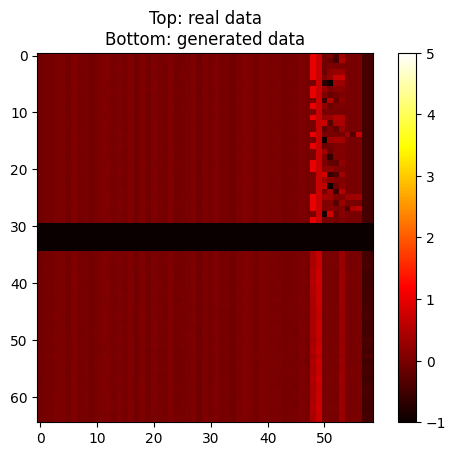

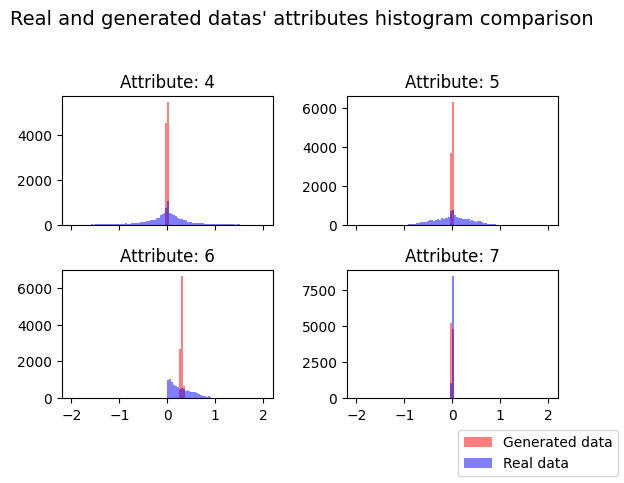

Epoch: 1/20 :: Train loss (overall): 0.013 :: Train loss (kld): 0.014 :: Train loss (mse): 0.013 :: err kld: 59457.2 :: err wass: 43.3
Deembeder acc: 237/868


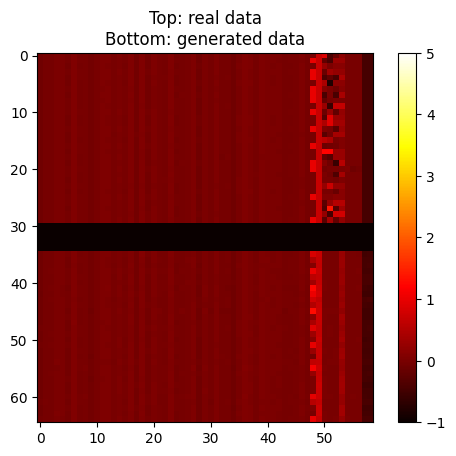

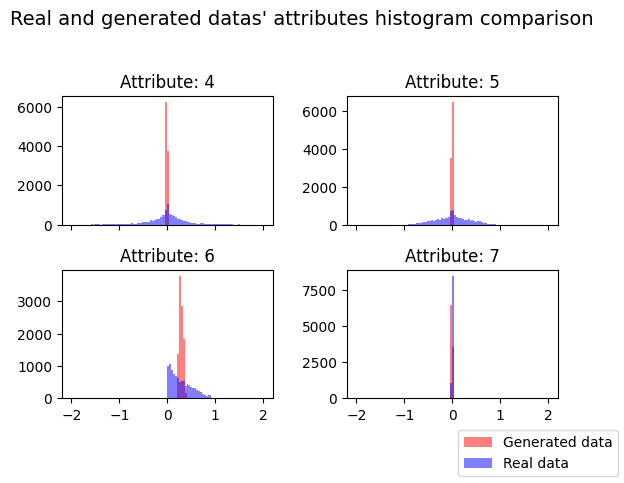

Epoch: 2/20 :: Train loss (overall): 0.011 :: Train loss (kld): 1.05 :: Train loss (mse): 0.01 :: err kld: 55354.5 :: err wass: 41.2
Deembeder acc: 779/868


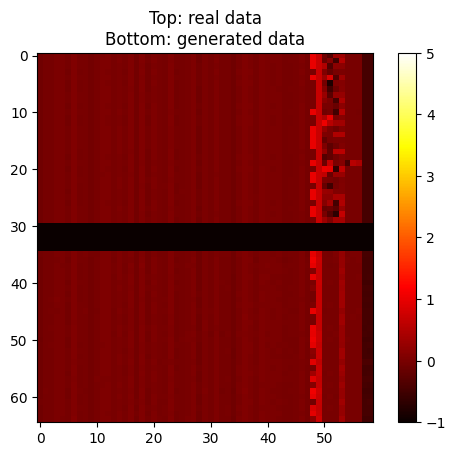

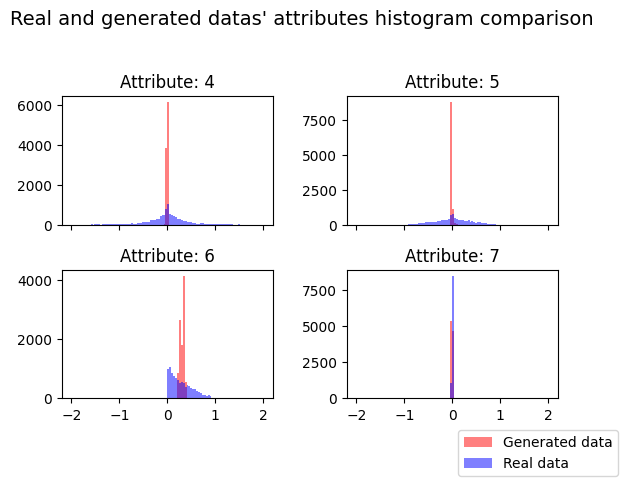

Epoch: 3/20 :: Train loss (overall): 0.011 :: Train loss (kld): 1.069 :: Train loss (mse): 0.01 :: err kld: 54529.8 :: err wass: 41.0
Deembeder acc: 849/868


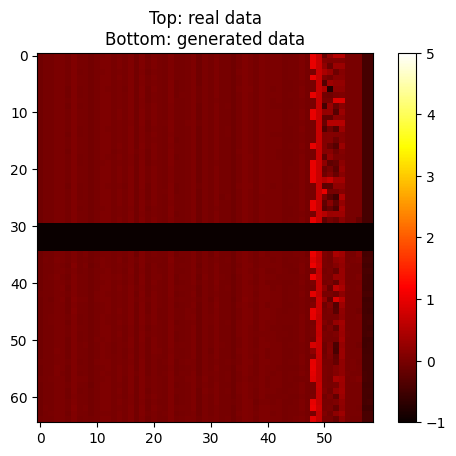

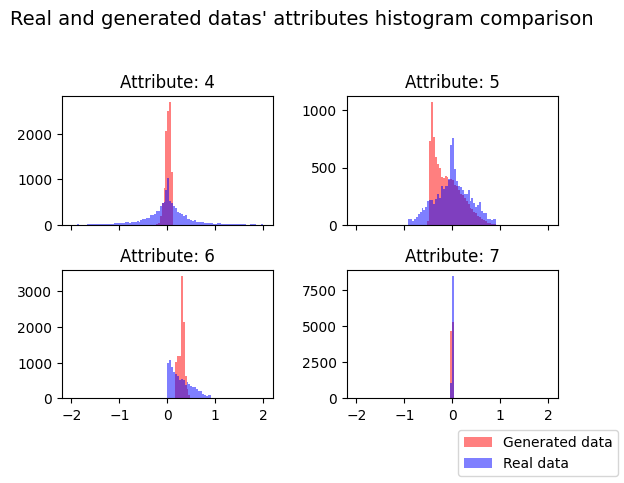

Epoch: 4/20 :: Train loss (overall): 0.009 :: Train loss (kld): 1.614 :: Train loss (mse): 0.008 :: err kld: 36619.3 :: err wass: 31.1
Deembeder acc: 861/868


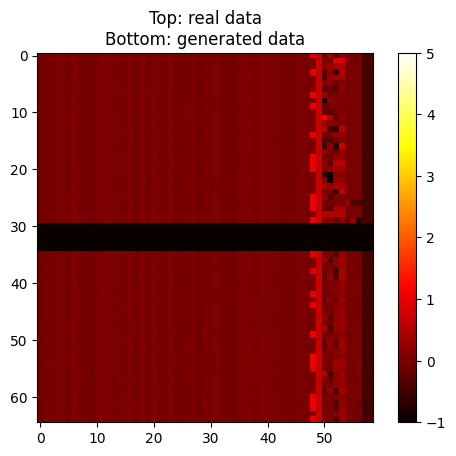

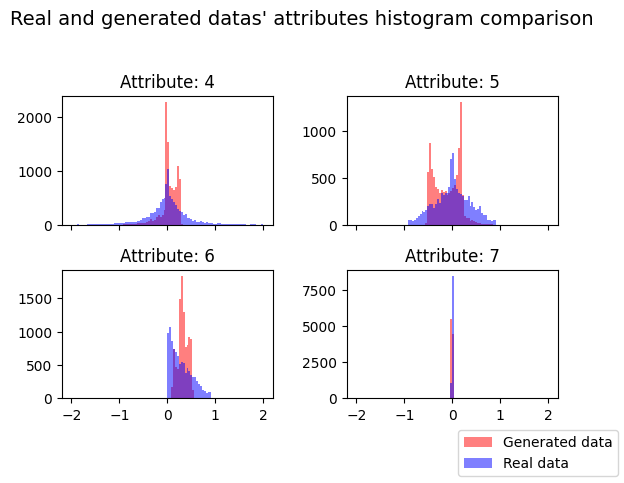

Epoch: 5/20 :: Train loss (overall): 0.009 :: Train loss (kld): 1.81 :: Train loss (mse): 0.007 :: err kld: 26991.8 :: err wass: 23.6
Deembeder acc: 865/868


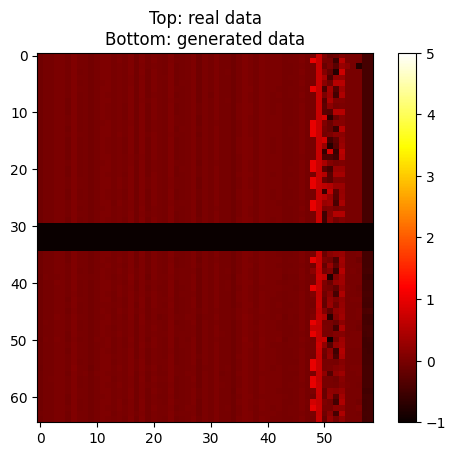

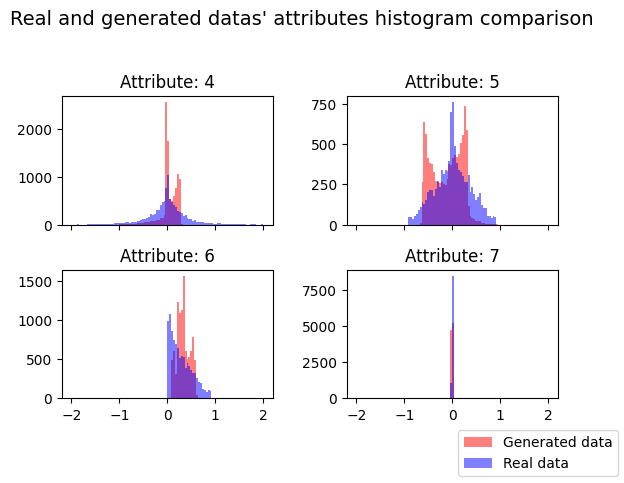

Epoch: 6/20 :: Train loss (overall): 0.008 :: Train loss (kld): 1.93 :: Train loss (mse): 0.006 :: err kld: 26583.6 :: err wass: 22.2
Deembeder acc: 865/868


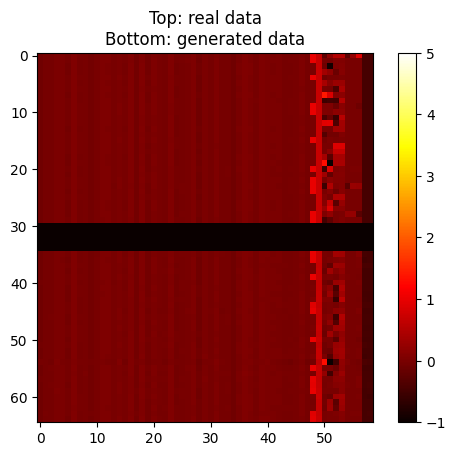

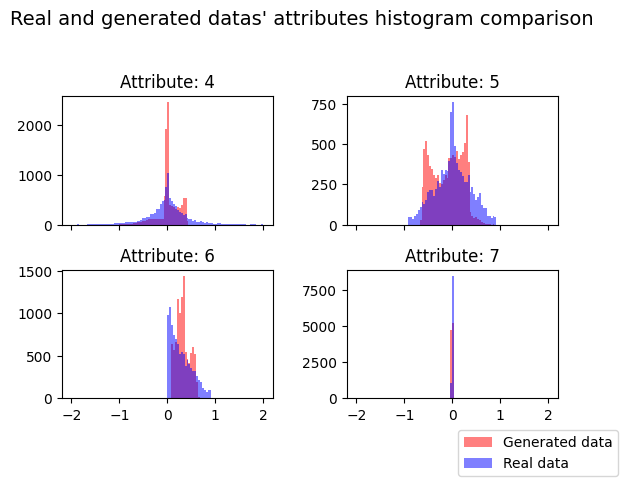

Epoch: 7/20 :: Train loss (overall): 0.008 :: Train loss (kld): 1.979 :: Train loss (mse): 0.006 :: err kld: 23627.7 :: err wass: 20.2
Deembeder acc: 866/868


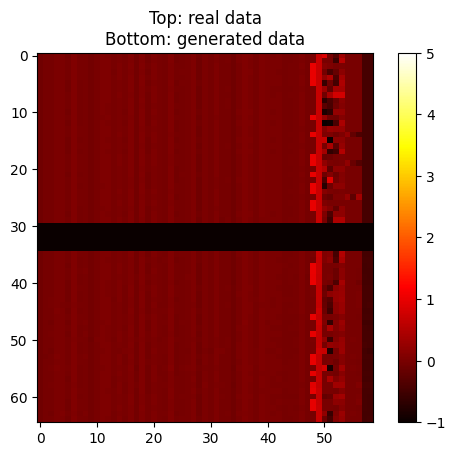

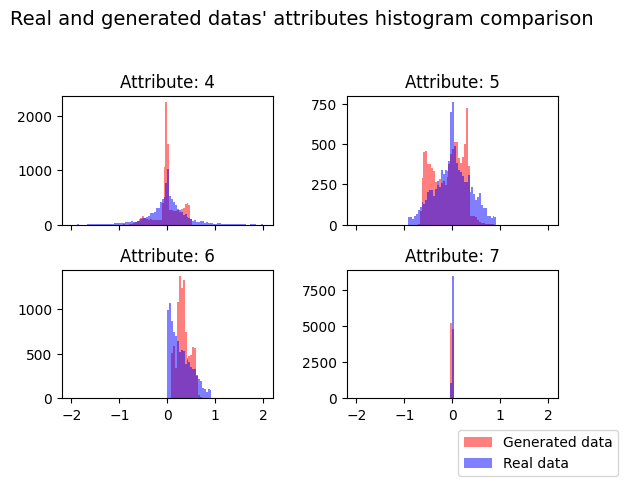

Epoch: 8/20 :: Train loss (overall): 0.008 :: Train loss (kld): 2.08 :: Train loss (mse): 0.006 :: err kld: 22812.0 :: err wass: 19.7
Deembeder acc: 868/868


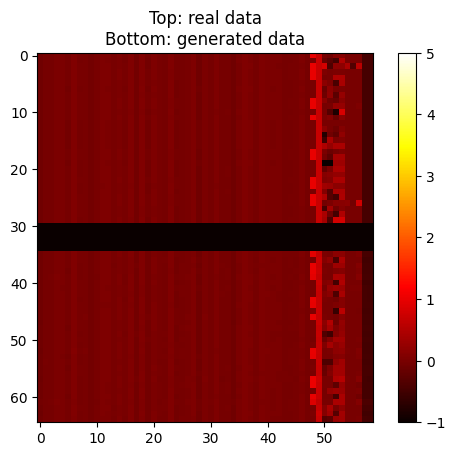

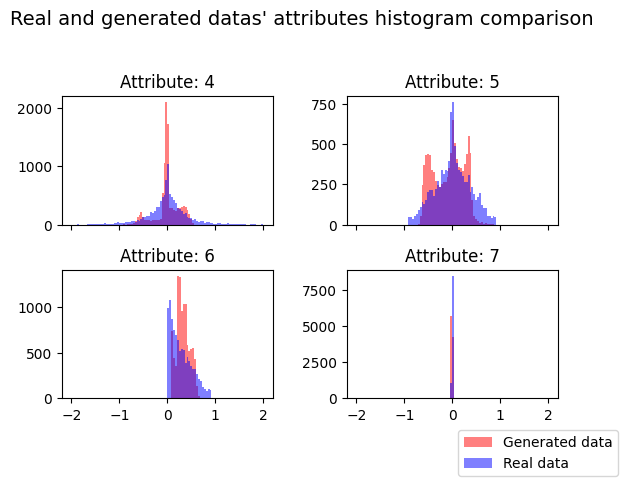

Epoch: 9/20 :: Train loss (overall): 0.008 :: Train loss (kld): 2.127 :: Train loss (mse): 0.006 :: err kld: 20921.3 :: err wass: 19.3
Deembeder acc: 868/868


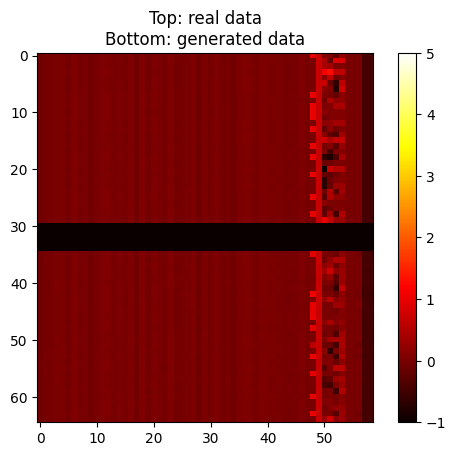

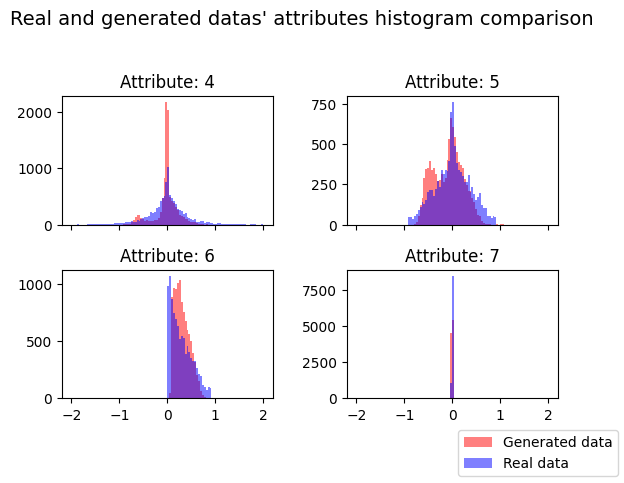

Epoch: 10/20 :: Train loss (overall): 0.007 :: Train loss (kld): 2.41 :: Train loss (mse): 0.005 :: err kld: 19751.5 :: err wass: 16.1
Deembeder acc: 868/868


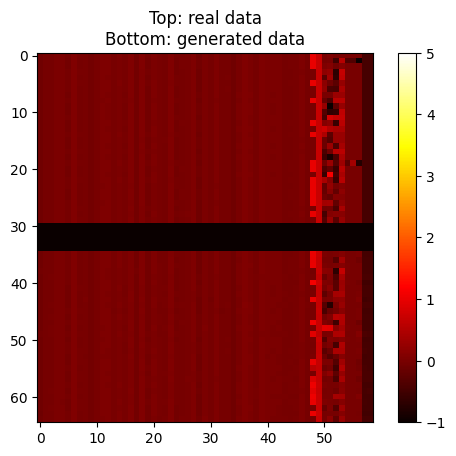

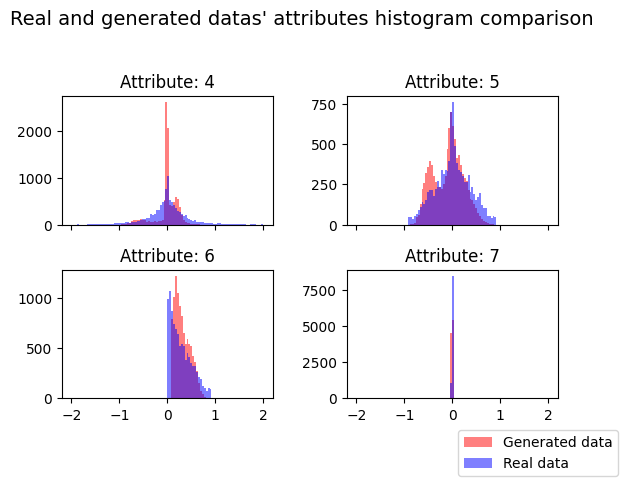

Epoch: 11/20 :: Train loss (overall): 0.007 :: Train loss (kld): 2.44 :: Train loss (mse): 0.005 :: err kld: 21408.7 :: err wass: 17.2
Deembeder acc: 868/868


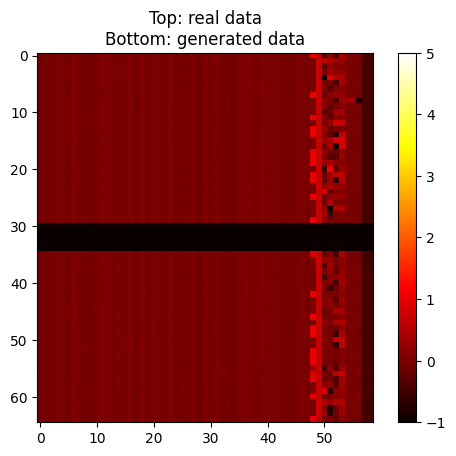

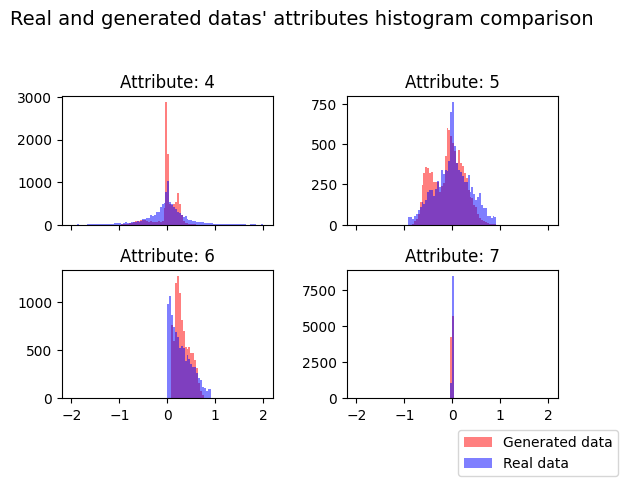

Epoch: 12/20 :: Train loss (overall): 0.007 :: Train loss (kld): 2.527 :: Train loss (mse): 0.004 :: err kld: 22861.0 :: err wass: 17.1
Deembeder acc: 868/868


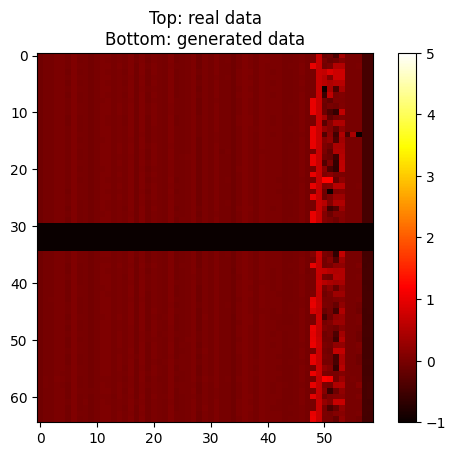

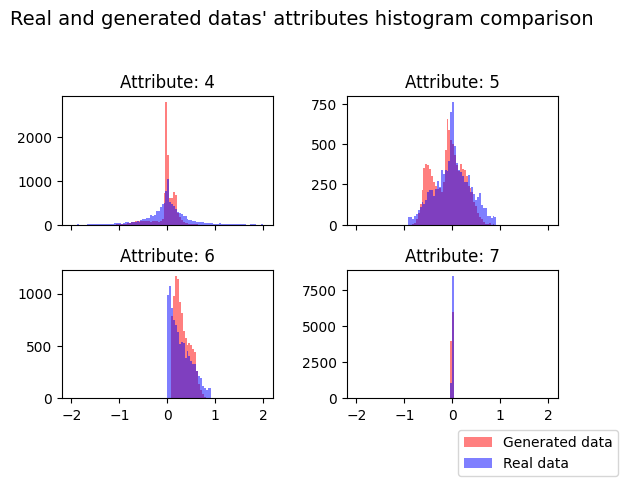

Epoch: 13/20 :: Train loss (overall): 0.007 :: Train loss (kld): 2.637 :: Train loss (mse): 0.004 :: err kld: 23001.8 :: err wass: 17.3
Deembeder acc: 868/868


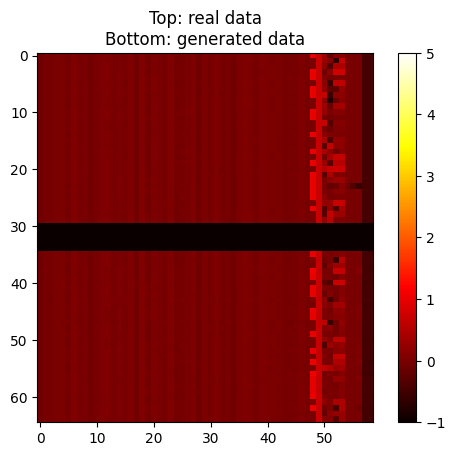

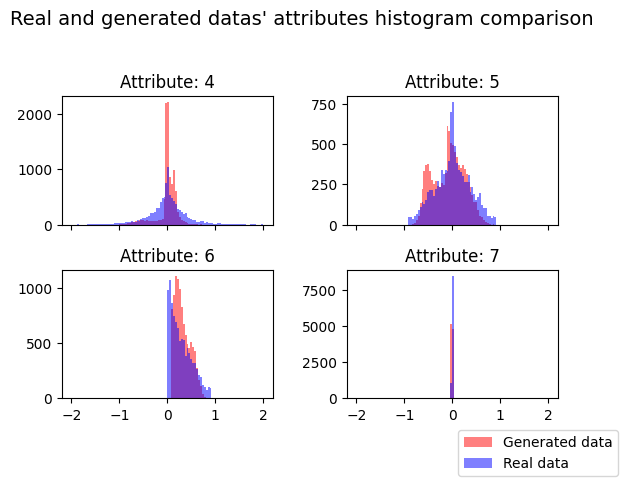

Epoch: 14/20 :: Train loss (overall): 0.007 :: Train loss (kld): 2.573 :: Train loss (mse): 0.004 :: err kld: 20354.7 :: err wass: 16.8
Deembeder acc: 868/868


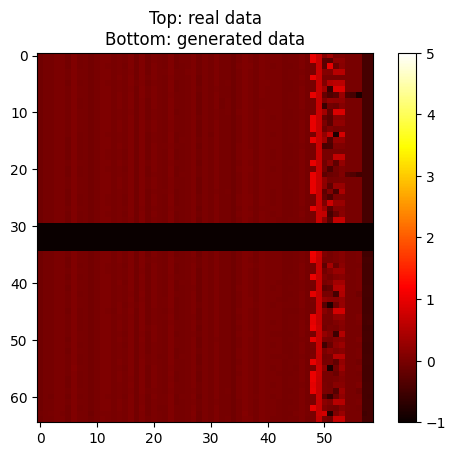

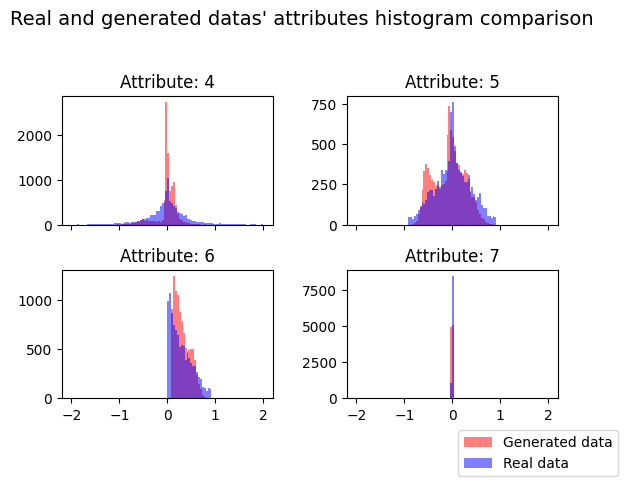

Epoch: 15/20 :: Train loss (overall): 0.007 :: Train loss (kld): 2.614 :: Train loss (mse): 0.004 :: err kld: 20230.4 :: err wass: 16.1
Deembeder acc: 868/868


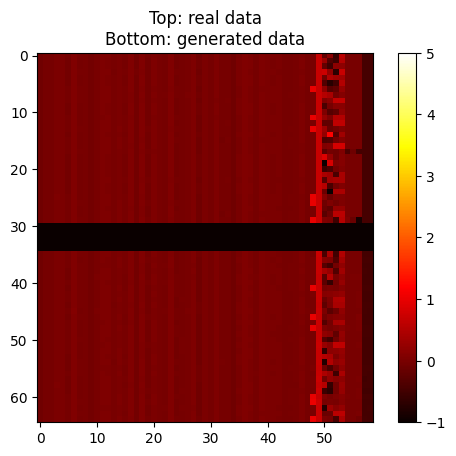

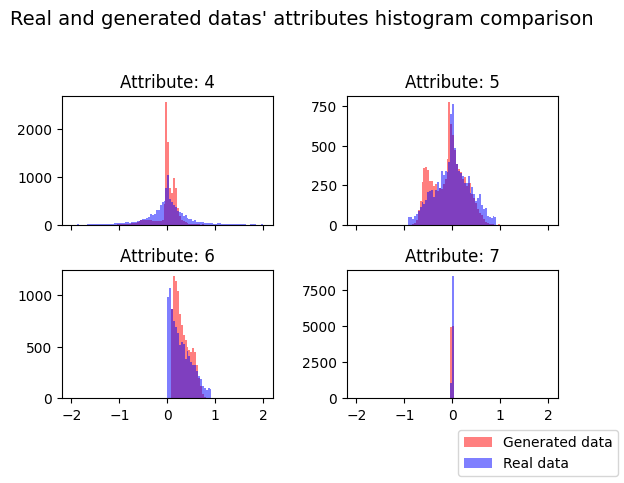

Epoch: 16/20 :: Train loss (overall): 0.007 :: Train loss (kld): 2.64 :: Train loss (mse): 0.004 :: err kld: 20009.7 :: err wass: 15.3
Deembeder acc: 868/868


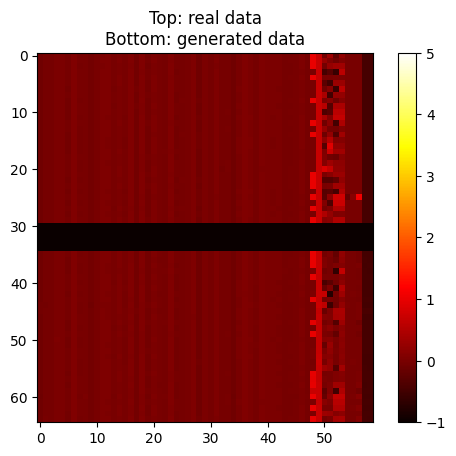

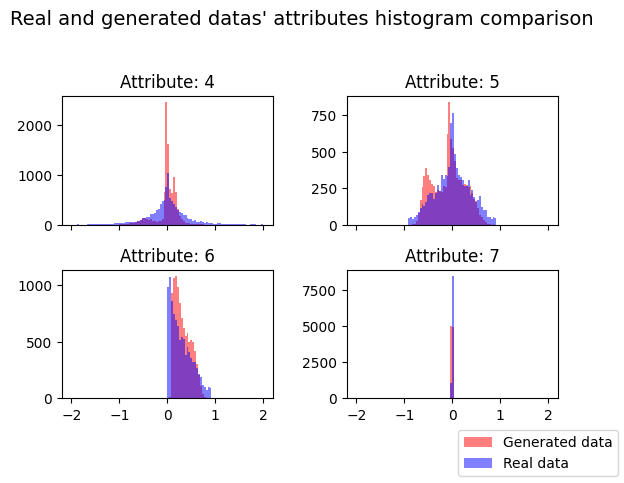

Epoch: 17/20 :: Train loss (overall): 0.007 :: Train loss (kld): 2.604 :: Train loss (mse): 0.004 :: err kld: 19594.4 :: err wass: 16.4
Deembeder acc: 868/868


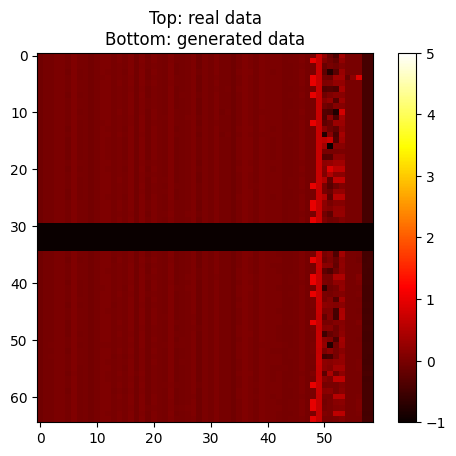

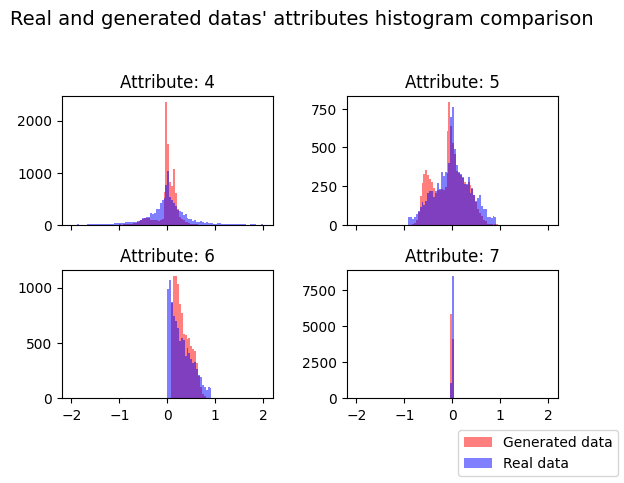

Epoch: 18/20 :: Train loss (overall): 0.007 :: Train loss (kld): 2.712 :: Train loss (mse): 0.004 :: err kld: 17806.8 :: err wass: 15.1
Deembeder acc: 868/868


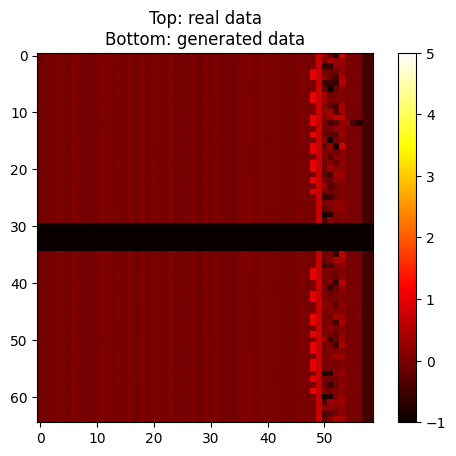

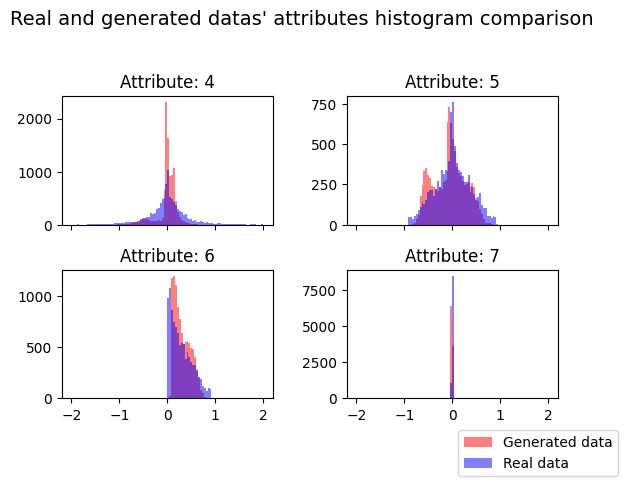

Epoch: 19/20 :: Train loss (overall): 0.007 :: Train loss (kld): 2.653 :: Train loss (mse): 0.004 :: err kld: 16641.6 :: err wass: 14.8
Deembeder acc: 868/868


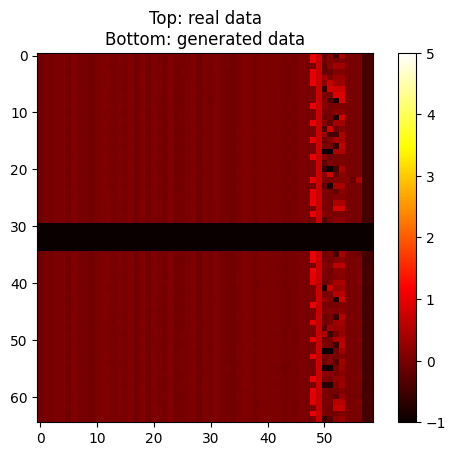

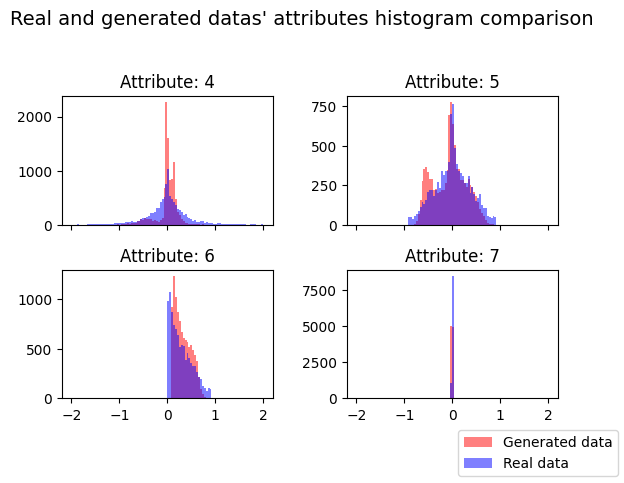

Epoch: 20/20 :: Train loss (overall): 0.007 :: Train loss (kld): 2.691 :: Train loss (mse): 0.004 :: err kld: 19207.8 :: err wass: 15.4
Deembeder acc: 868/868


In [35]:
for epoch in range(EPOCHS):

    for n_batch, batch in enumerate(train_data_loader):
        vae_optim.zero_grad()

        real_data: torch.Tensor = batch.to(device).detach()

        emb_data = embed_data(real_data)

        gen_data, lat_mean, lat_logvar, lat_vec = vae(emb_data)

        loss, mse_loss, kld_loss = criterion(
            input_x=emb_data,
            output_x=gen_data,
            lat_mean=lat_mean,
            lat_logvar=lat_logvar
        )

        loss.backward()
        vae_optim.step()

        train_deembeder(epochs=2)

    # Evaluate
    show_heatmaps(emb_data, gen_data)
    err_kld, err_wass = gen_show_comp_hists(
        vae.decoder,
        X,
        attr_idxs=[FEATURES - 8, FEATURES - 7, FEATURES - 6, FEATURES - 5],
        emb=False,
    )

    print(
        f'Epoch: {epoch + 1}/{EPOCHS} :: '
        f'Train loss (overall): {round(loss.item(), 3)} :: '
        f'Train loss (kld): {round(kld_loss.item(), 3)} :: '
        f'Train loss (mse): {round(mse_loss.item(), 3)} :: '
        f'err kld: {round(err_kld, 1)} :: '
        f'err wass: {round(err_wass, 1)}'
    )
    print_deemb_quality(torch.arange(N_PARTICLES, device=device))

## Wasserstein autoencoder (WAE) generator

In [36]:
EPOCHS = 20
BATCH_SIZE = 8*1024
LR = 5e-5

train_data_loader = DataLoader(X_train, batch_size=BATCH_SIZE, shuffle=True)
test_data_loader = DataLoader(X_test, batch_size=BATCH_SIZE, shuffle=True)

class PrtclWAEEncoder(nn.Module):
    def __init__(self, emb_features, latent_size):
        super(PrtclWAEEncoder, self).__init__()

        self.emb_features = emb_features
        self.latent_size = latent_size

        self.encoder = nn.Sequential(
            nn.Linear(emb_features, 1024),
            nn.Dropout(.1),
            nn.Tanh(),

            nn.Linear(1024, 512),
            nn.Dropout(.1),
            nn.Tanh(),

            nn.Linear(512, 256),
            nn.Dropout(.1),
            nn.Tanh(),

            nn.Linear(256, 128),
            nn.Dropout(.1),
            nn.Tanh(),

            nn.Linear(128, 128),
            nn.Dropout(.1),
            nn.Tanh(),

            nn.Linear(128, latent_size),

        )

    def freeze(self, value: bool = True):
        for param in self.encoder.parameters():
            param.requires_grad = not value

    def forward(self, x: torch.Tensor):
        return self.encoder(x)

class PrtclWAEDecoder(nn.Module):
    def __init__(self, emb_features, latent_size):
        super(PrtclWAEDecoder, self).__init__()

        self.emb_features = emb_features
        self.latent_size = latent_size

        self.decoder = nn.Sequential(
            nn.Linear(latent_size, 128),
            nn.Tanh(),
            nn.Linear(128, 256),
            nn.Tanh(),
            nn.Linear(256, 512),
            nn.Tanh(),
            nn.Linear(512, 1024),
            nn.Tanh(),
            nn.Linear(1024, 2048),
            nn.Tanh(),
            nn.Linear(2048, emb_features),
        )

    def freeze(self, value: bool = True):
        for param in self.decoder.parameters():
            param.requires_grad = not value

    def forward(self, x: torch.Tensor):
        return self.decoder(x)

class PrtclWAEDiscriminator(nn.Module):
    def __init__(self, latent_size):
        super(PrtclWAEDiscriminator, self).__init__()

        self.latent_size = latent_size

        self.discriminator = nn.Sequential(
            nn.Linear(latent_size, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 32),
            nn.Tanh(),
            nn.Linear(32, 8),
            nn.Tanh(),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )

    def freeze(self, value: bool = True):
        for param in self.discriminator.parameters():
            param.requires_grad = not value

    def forward(self, x: torch.Tensor):
        return self.discriminator(x).squeeze()

encoder = PrtclWAEEncoder(
    emb_features=EMB_FEATURES,
    latent_size=PRTCL_LATENT_SPACE_SIZE,
).to(dtype=dtype, device=device)

decoder = PrtclWAEDecoder(
    emb_features=EMB_FEATURES,
    latent_size=PRTCL_LATENT_SPACE_SIZE,
).to(dtype=dtype, device=device)

discriminator = PrtclWAEDiscriminator(
    latent_size=PRTCL_LATENT_SPACE_SIZE,
).to(dtype=dtype, device=device)

enc_optim = torch.optim.Adam(encoder.parameters(), lr=LR)
dec_optim = torch.optim.Adam(decoder.parameters(), lr=LR)
dis_optim = torch.optim.Adam(discriminator.parameters(), lr=LR)

def calculate_valid_loss() -> float:
    loss = 0
    criterion = MSELoss()

    for batch_data in test_data_loader:
        emb_data = embed_data(batch_data.to(device))
        recon_data = decoder(encoder(emb_data))
        train_loss = criterion(recon_data, emb_data)

        loss += train_loss.item()

    loss /= len(test_data_loader)

    return loss

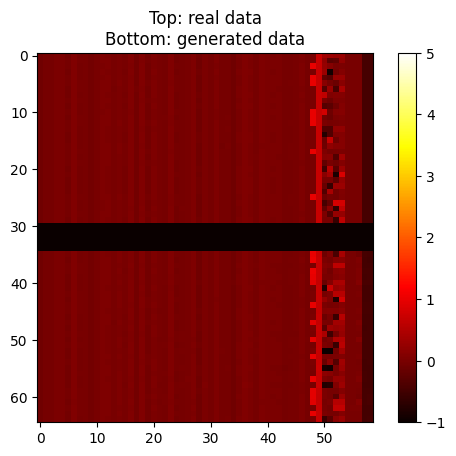

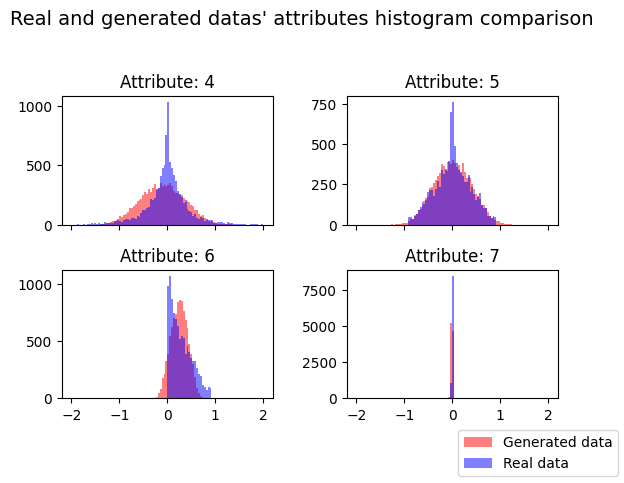

Epoch: 1/20 :: Train loss: 0.009 :: Valid loss: 0.009 :: err kld: 21276.8 :: err wass: 10.7
Deembeder acc: 868/868


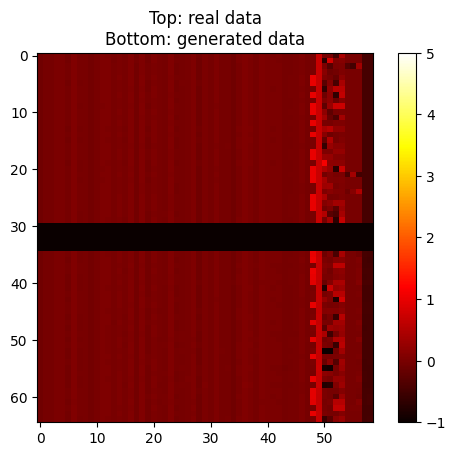

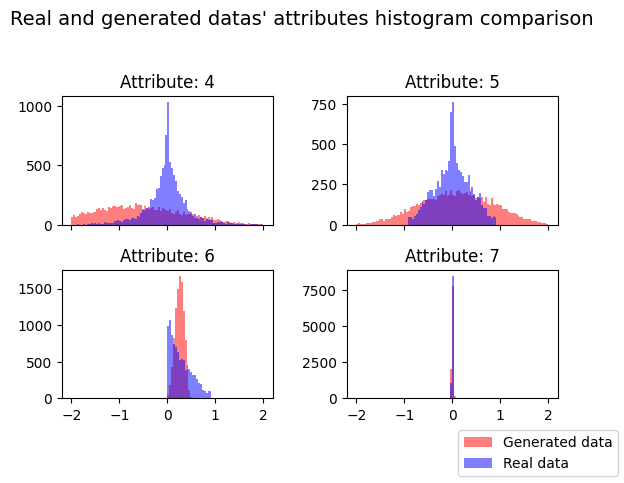

Epoch: 2/20 :: Train loss: 0.004 :: Valid loss: 0.004 :: err kld: 35371.1 :: err wass: 33.3
Deembeder acc: 868/868


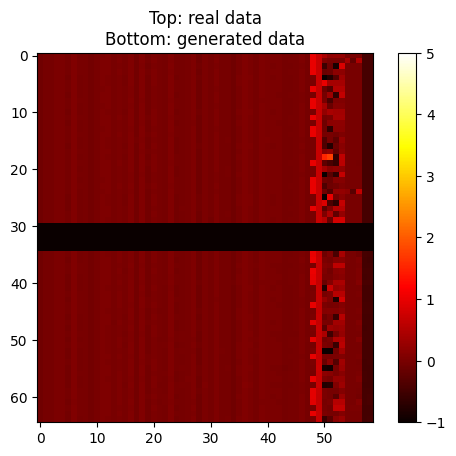

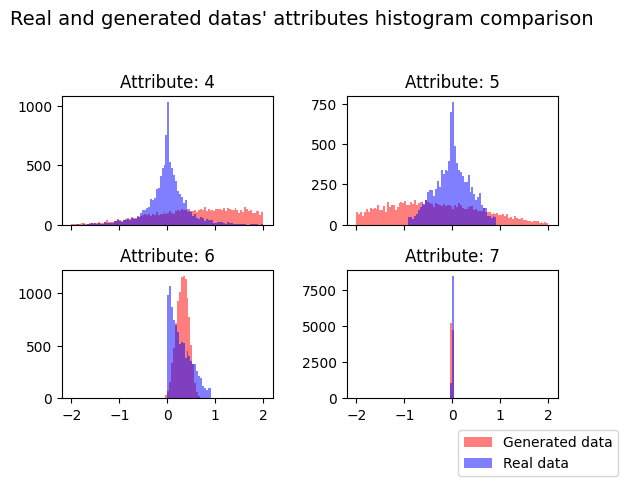

Epoch: 3/20 :: Train loss: 0.004 :: Valid loss: 0.004 :: err kld: 35704.6 :: err wass: 36.9
Deembeder acc: 868/868


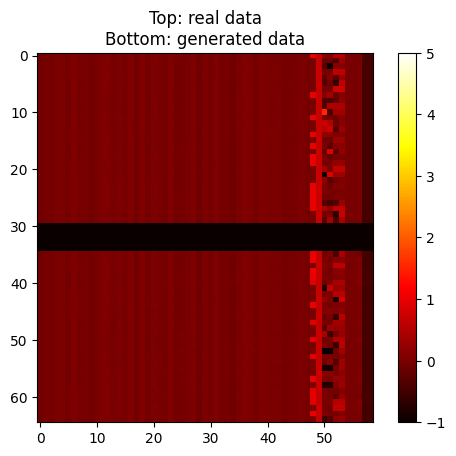

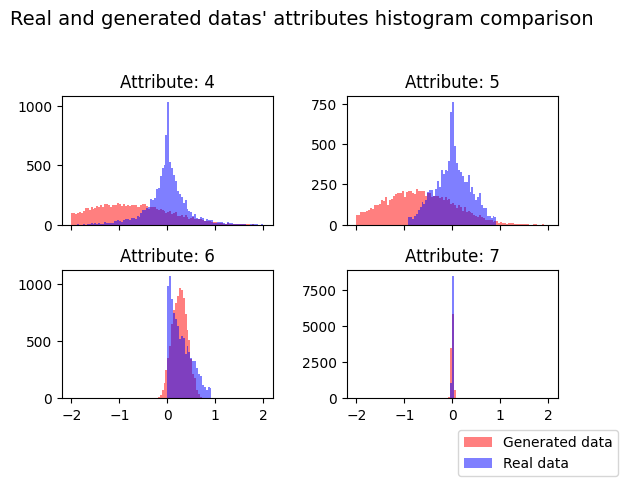

Epoch: 4/20 :: Train loss: 0.003 :: Valid loss: 0.003 :: err kld: 36078.8 :: err wass: 37.6
Deembeder acc: 868/868


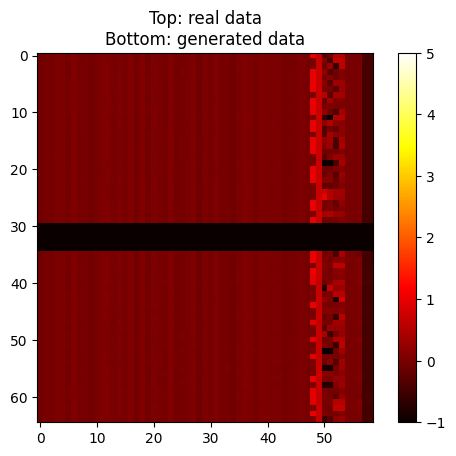

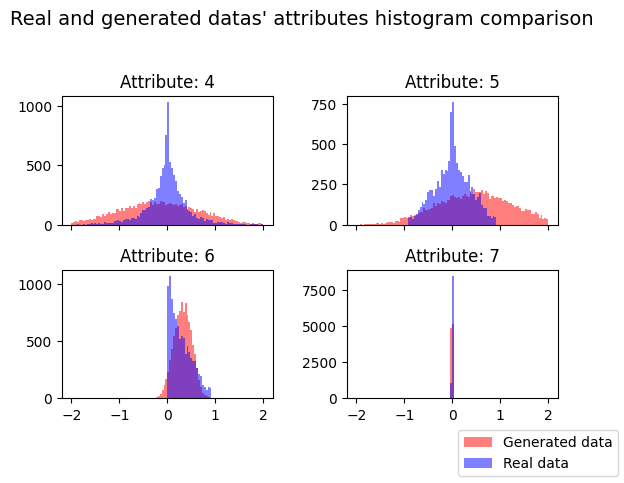

Epoch: 5/20 :: Train loss: 0.003 :: Valid loss: 0.003 :: err kld: 27894.8 :: err wass: 25.4
Deembeder acc: 868/868


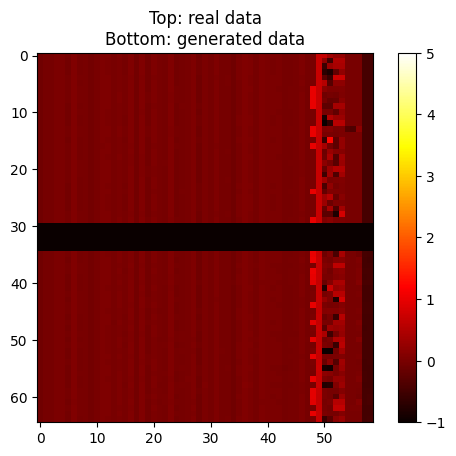

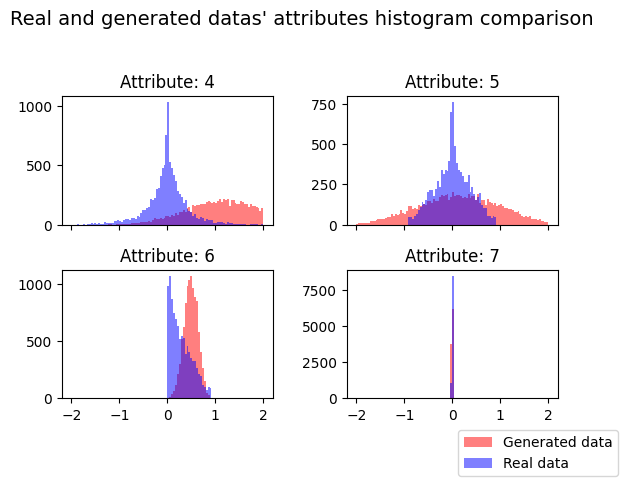

Epoch: 6/20 :: Train loss: 0.004 :: Valid loss: 0.004 :: err kld: 38428.8 :: err wass: 51.4
Deembeder acc: 868/868


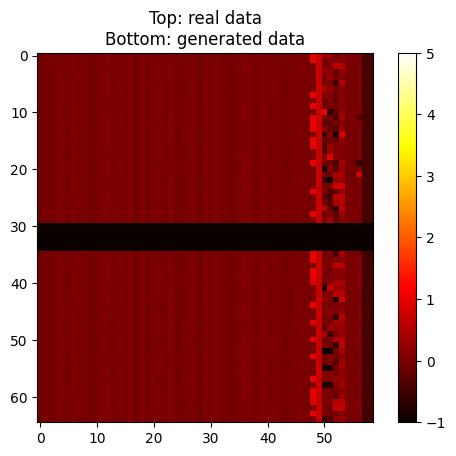

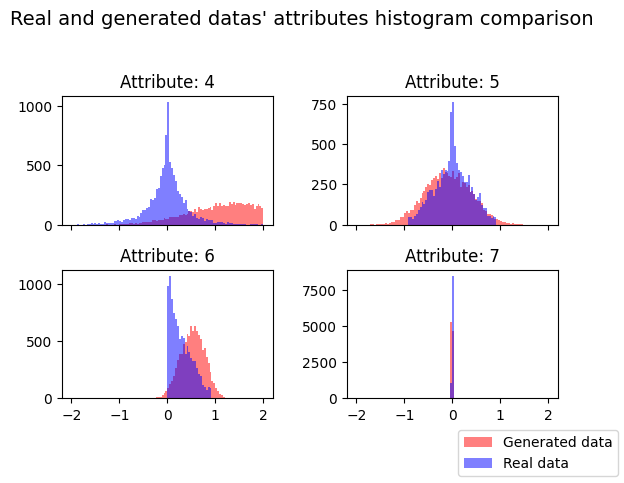

Epoch: 7/20 :: Train loss: 0.003 :: Valid loss: 0.003 :: err kld: 33308.7 :: err wass: 41.8
Deembeder acc: 868/868


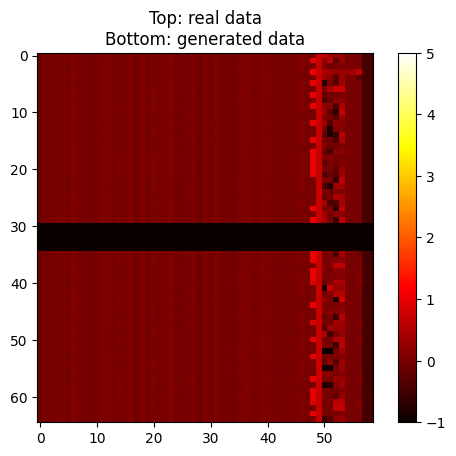

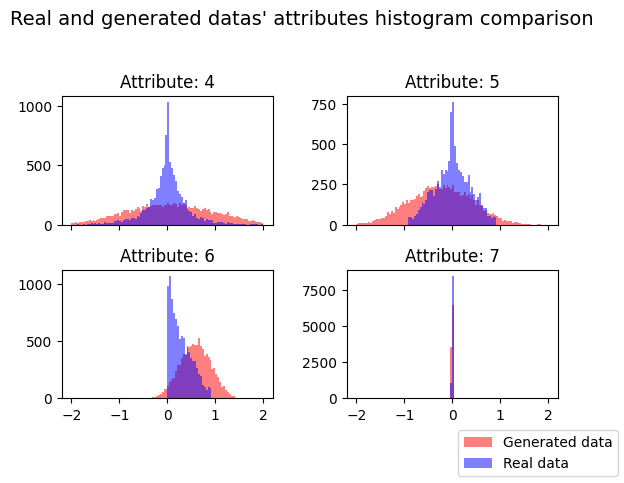

Epoch: 8/20 :: Train loss: 0.002 :: Valid loss: 0.002 :: err kld: 29329.5 :: err wass: 30.3
Deembeder acc: 868/868


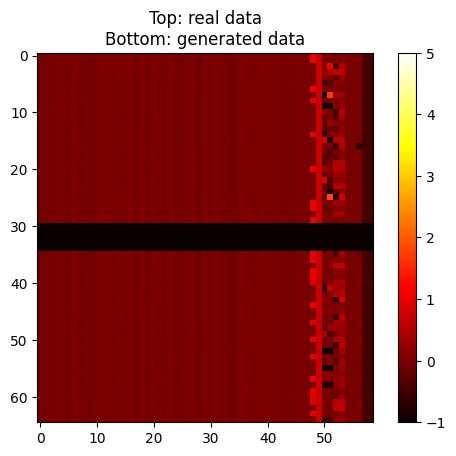

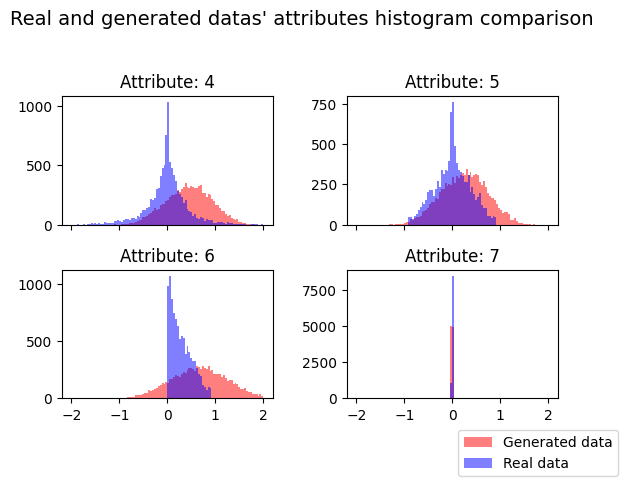

Epoch: 9/20 :: Train loss: 0.003 :: Valid loss: 0.003 :: err kld: 29271.0 :: err wass: 32.6
Deembeder acc: 868/868


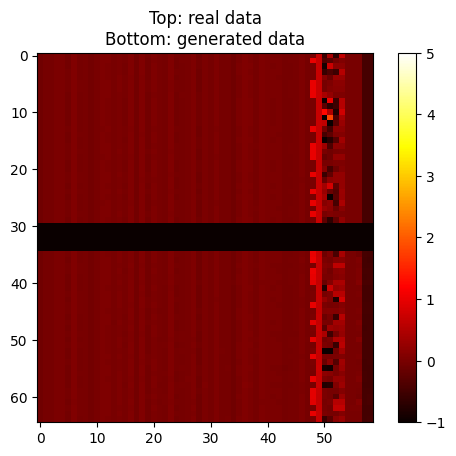

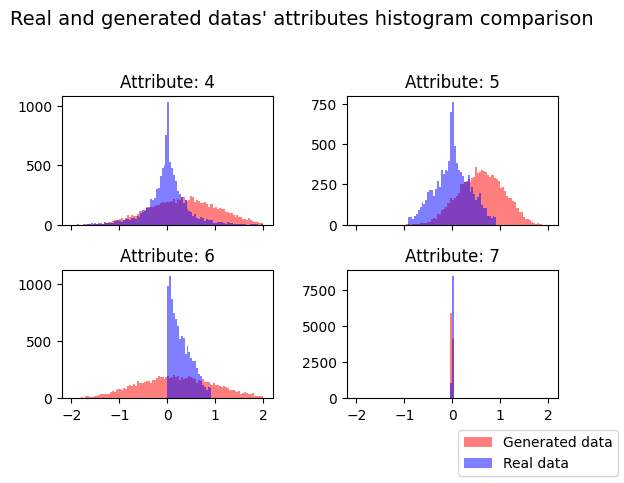

Epoch: 10/20 :: Train loss: 0.003 :: Valid loss: 0.003 :: err kld: 36349.7 :: err wass: 40.1
Deembeder acc: 868/868


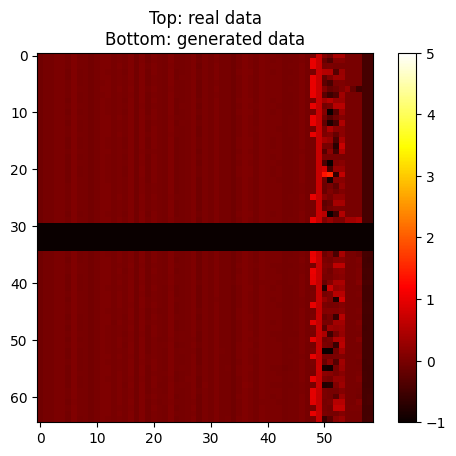

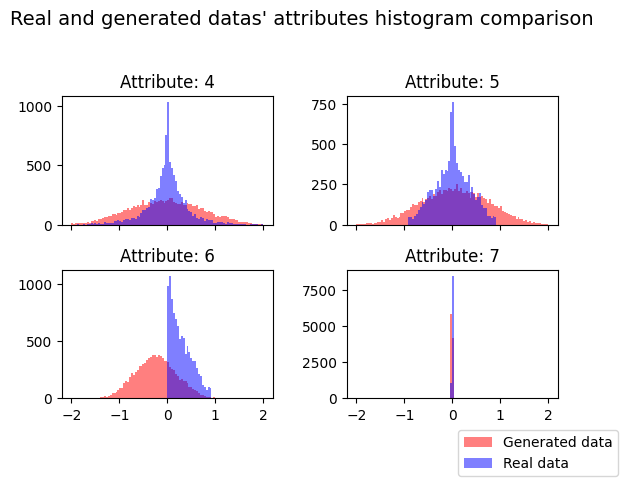

Epoch: 11/20 :: Train loss: 0.002 :: Valid loss: 0.002 :: err kld: 33957.6 :: err wass: 29.7
Deembeder acc: 868/868


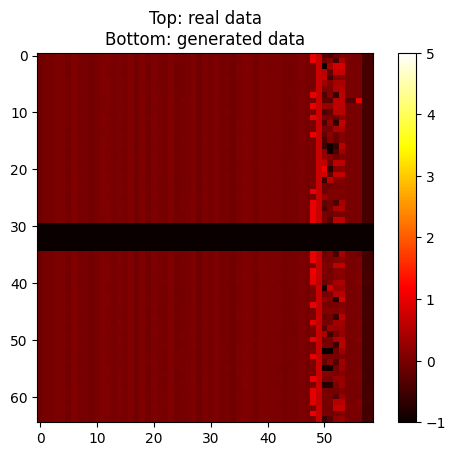

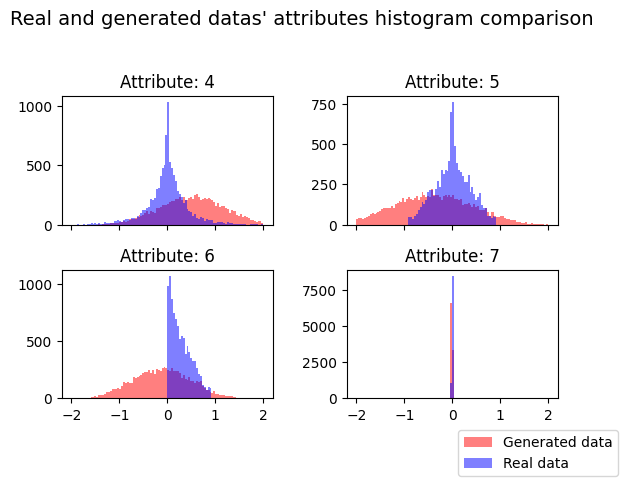

Epoch: 12/20 :: Train loss: 0.003 :: Valid loss: 0.003 :: err kld: 35509.4 :: err wass: 33.7
Deembeder acc: 868/868


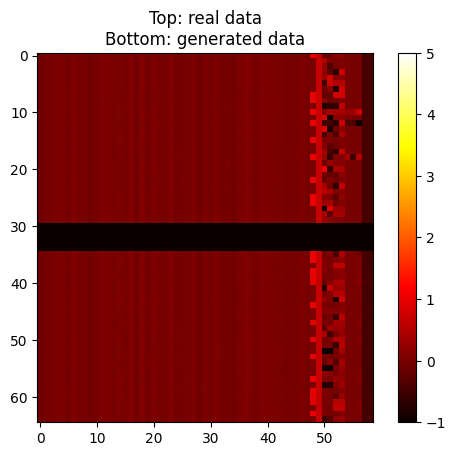

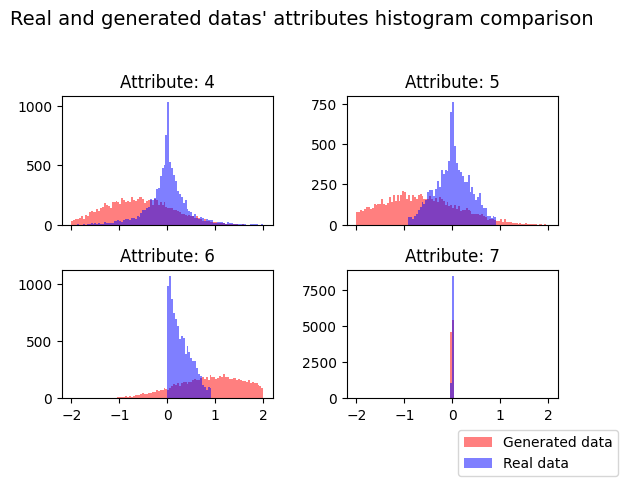

Epoch: 13/20 :: Train loss: 0.002 :: Valid loss: 0.002 :: err kld: 41524.9 :: err wass: 43.9
Deembeder acc: 868/868


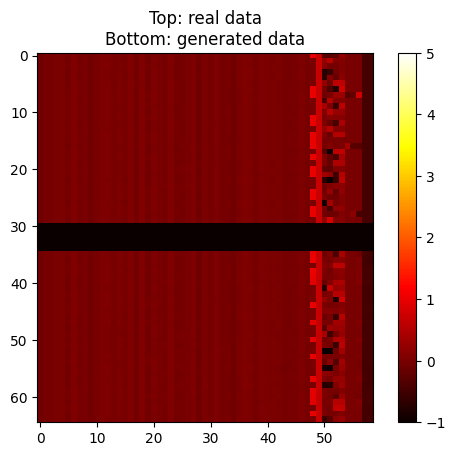

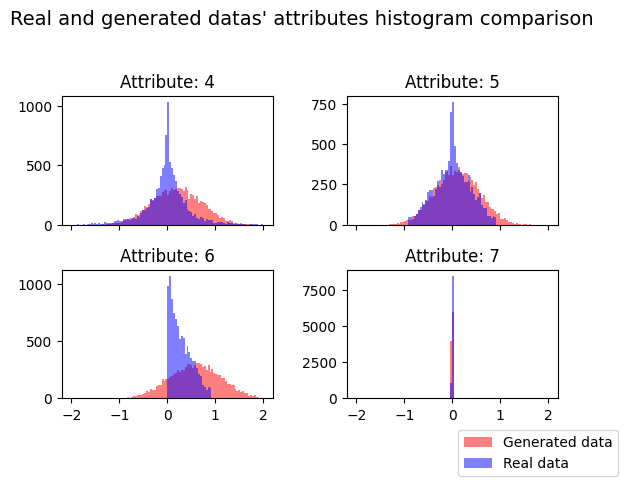

Epoch: 14/20 :: Train loss: 0.001 :: Valid loss: 0.001 :: err kld: 26914.1 :: err wass: 20.1
Deembeder acc: 868/868


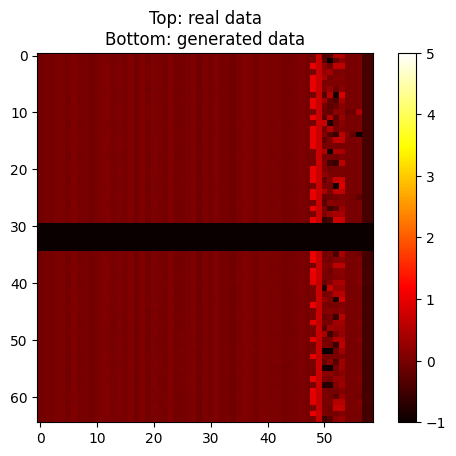

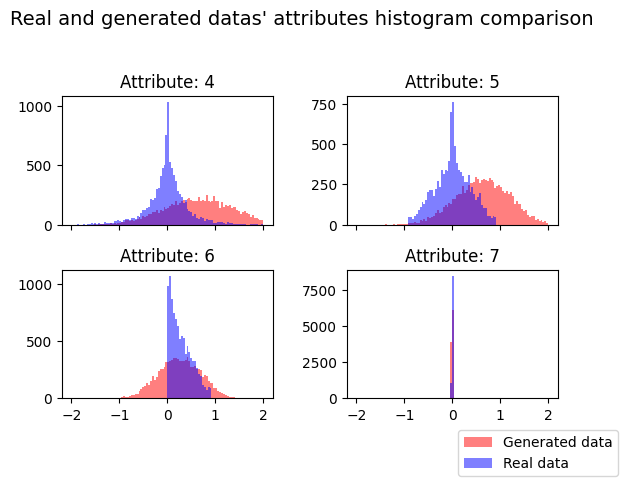

Epoch: 15/20 :: Train loss: 0.002 :: Valid loss: 0.002 :: err kld: 34627.0 :: err wass: 37.6
Deembeder acc: 868/868


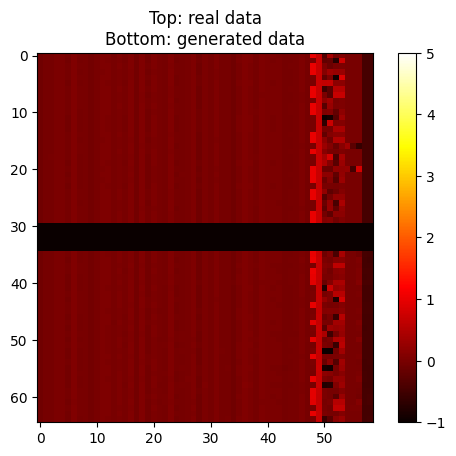

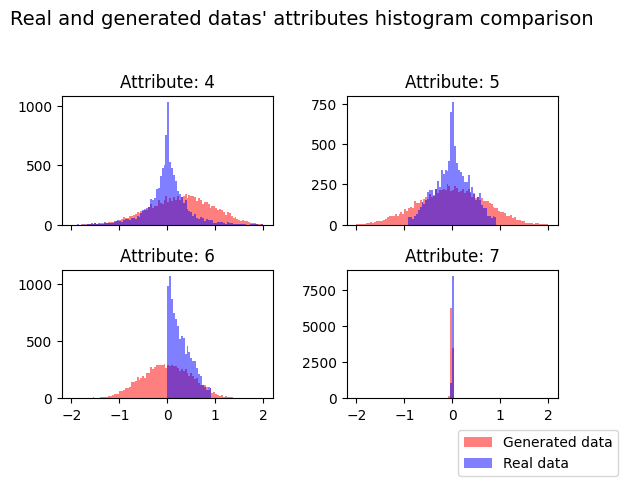

Epoch: 16/20 :: Train loss: 0.002 :: Valid loss: 0.002 :: err kld: 32066.6 :: err wass: 23.7
Deembeder acc: 868/868


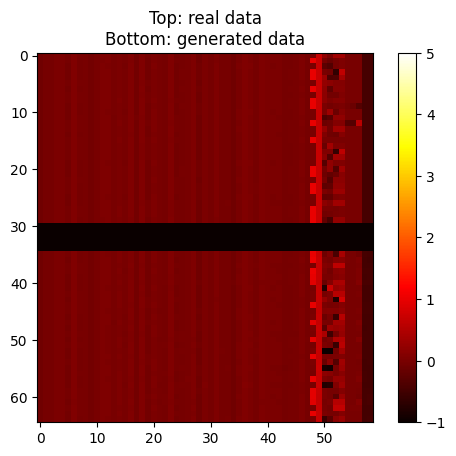

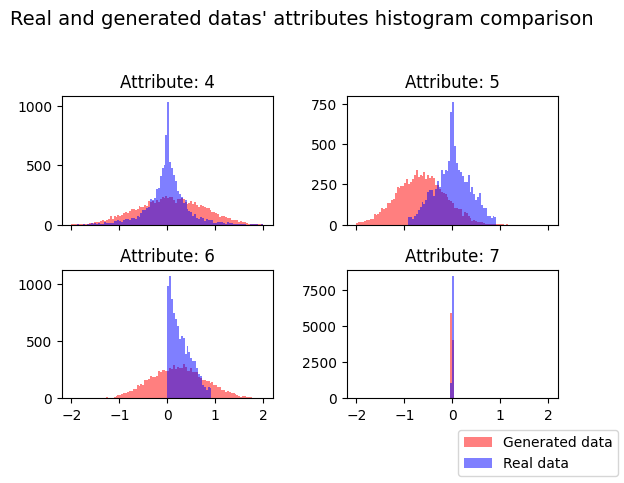

Epoch: 17/20 :: Train loss: 0.002 :: Valid loss: 0.002 :: err kld: 33135.4 :: err wass: 32.9
Deembeder acc: 868/868


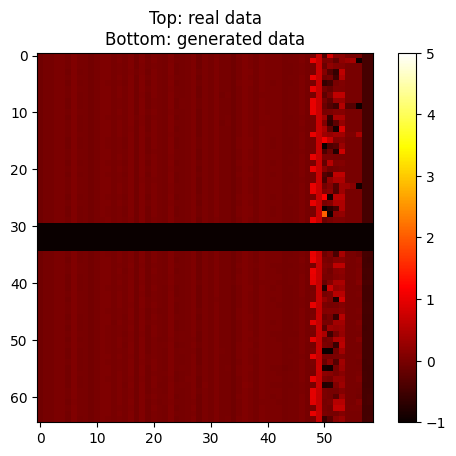

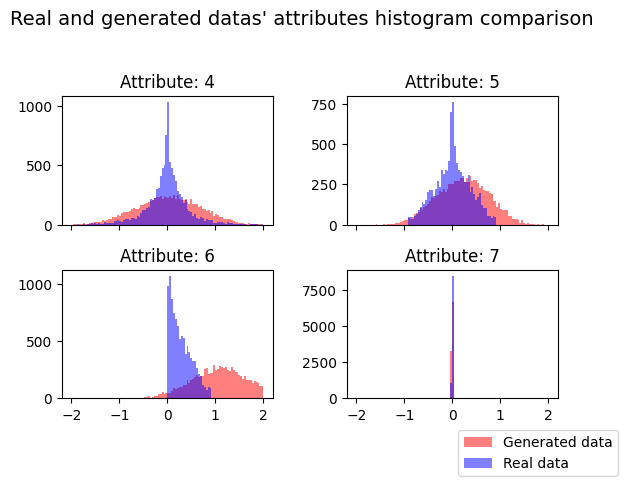

Epoch: 18/20 :: Train loss: 0.002 :: Valid loss: 0.002 :: err kld: 35665.6 :: err wass: 35.3
Deembeder acc: 868/868


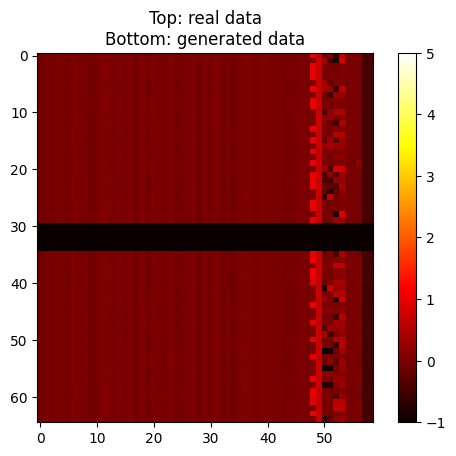

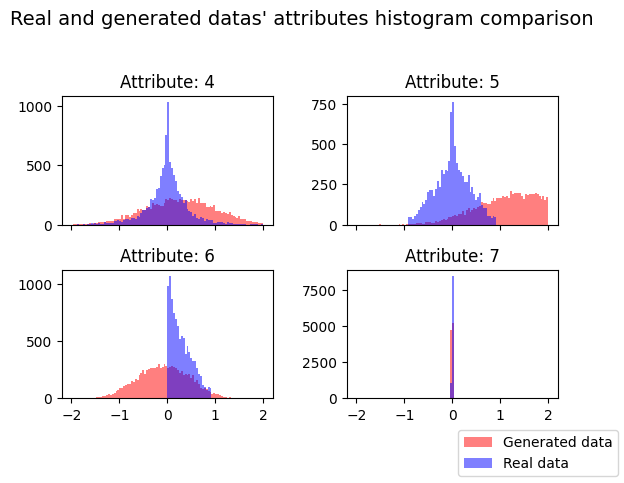

Epoch: 19/20 :: Train loss: 0.003 :: Valid loss: 0.003 :: err kld: 43288.2 :: err wass: 46.9
Deembeder acc: 868/868


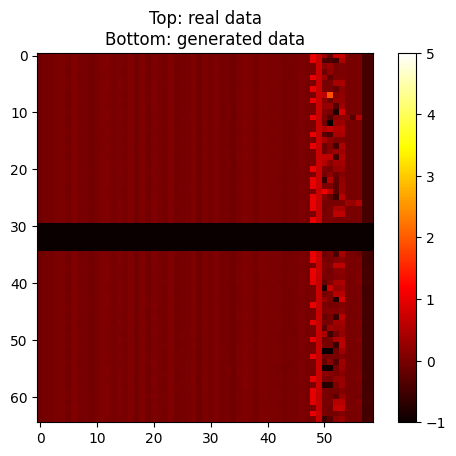

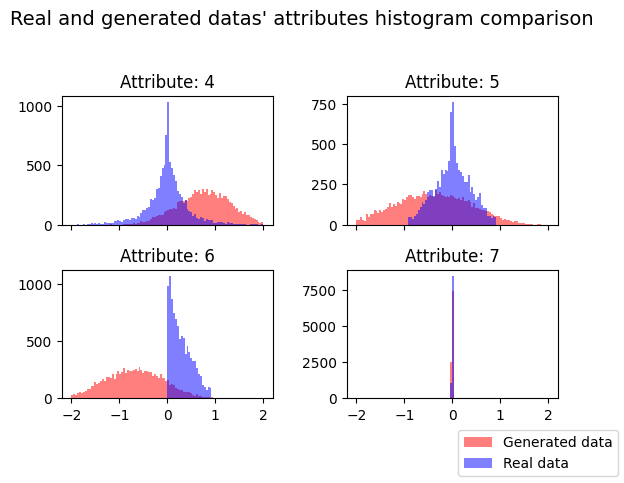

Epoch: 20/20 :: Train loss: 0.002 :: Valid loss: 0.002 :: err kld: 47675.5 :: err wass: 54.8
Deembeder acc: 868/868


In [37]:
for epoch in range(EPOCHS):

    for n_batch, batch in enumerate(train_data_loader):
        encoder.zero_grad()
        decoder.zero_grad()
        discriminator.zero_grad()

        real_data: torch.Tensor = batch.to(dtype=dtype, device=device)
        emb_data = embed_data(real_data).detach()

        batch_size = len(batch)

        zeros = torch.zeros(batch_size, dtype=dtype, device=device, requires_grad=False)
        ones = torch.ones(batch_size, dtype=dtype, device=device, requires_grad=False)

        # ======== Train Discriminator ======== #
        decoder.freeze(True)
        encoder.freeze(True)
        discriminator.freeze(False)

        lat_fake = torch.randn(batch_size, PRTCL_LATENT_SPACE_SIZE, dtype=dtype, device=device)
        disc_fake = discriminator(lat_fake)

        lat_real = encoder(emb_data)
        disc_real = discriminator(lat_real)

        loss_fake = MSELoss()(disc_fake, zeros)
        loss_real = MSELoss()(disc_real, ones)

        loss_fake.backward()
        loss_real.backward()

        dis_optim.step()

        # ======== Train Generator ======== #
        decoder.freeze(False)
        encoder.freeze(False)
        discriminator.freeze(True)

        lat_real = encoder(emb_data)
        recon_data = decoder(lat_real)
        d_real = discriminator(encoder(emb_data))

        recon_loss = MSELoss()(emb_data, recon_data)
        d_loss = MSELoss()(d_real, zeros)

        recon_loss.backward()
        d_loss.backward()

        enc_optim.step()
        dec_optim.step()

        train_deembeder(epochs=2)
    
    # Evaluate
    show_heatmaps(emb_data, gen_data)
    err_kld, err_wass = gen_show_comp_hists(
        decoder,
        X,
        attr_idxs=[FEATURES - 8, FEATURES - 7, FEATURES - 6, FEATURES - 5],
        emb=False,
    )

    valid_loss = calculate_valid_loss()

    print(
        f'Epoch: {epoch + 1}/{EPOCHS} :: '
        f'Train loss: {round(recon_loss.item(), 3)} :: '
        f'Valid loss: {round(valid_loss, 3)} :: '
        f'err kld: {round(err_kld, 1)} :: '
        f'err wass: {round(err_wass, 1)}'
    )
    print_deemb_quality(torch.arange(N_PARTICLES, device=device))


## GAN generator

In [38]:
EPOCHS = 20
BATCH_SIZE = 8*1024
LR = 5e-5

train_data_loader = DataLoader(X_train, batch_size=BATCH_SIZE, shuffle=True)
test_data_loader = DataLoader(X_test, batch_size=BATCH_SIZE, shuffle=True)

class PrtclGANDiscriminator(nn.Module):
    def __init__(self, emb_features):
        super(PrtclGANDiscriminator, self).__init__()

        self.emb_features = emb_features
        self.net = nn.Sequential(

            nn.Linear(emb_features, 512),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(512, 2048),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(2048, 1024),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(1024, 512),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(512, 256),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(256, 128),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(128, 32),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(32, 1),
            nn.Sigmoid()

        )

    def forward(self, x: torch.Tensor):
        return self.net(x).squeeze()
    
class PrtclGANGenerator(nn.Module):
    def __init__(self, emb_features, latent_size):
        super(PrtclGANGenerator, self).__init__()

        self.emb_features = emb_features
        self.latent_size = latent_size

        self.net = nn.Sequential(
            nn.Linear(latent_size, 128),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(128, 256),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(256, 512),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(512, 1024),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(1024, 2048),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(2048, 512),
            nn.Dropout(.1),
            nn.LeakyReLU(.1),

            nn.Linear(512, emb_features),
        )

    def forward(self, x: torch.Tensor):
        return self.net(x)

generator = PrtclGANGenerator(
    emb_features=EMB_FEATURES,
    latent_size=PRTCL_LATENT_SPACE_SIZE,
).to(dtype=dtype, device=device)

discriminator = PrtclGANDiscriminator(
    emb_features=EMB_FEATURES,
).to(dtype=dtype, device=device)

gen_optim = torch.optim.Adam(generator.parameters(), lr=LR, betas=(0, .9))
dis_optim = torch.optim.Adam(discriminator.parameters(), lr=LR, betas=(0, .9))

def criterion(y_real, y_pred) -> Variable:
    return MSELoss()(y_real, y_pred)

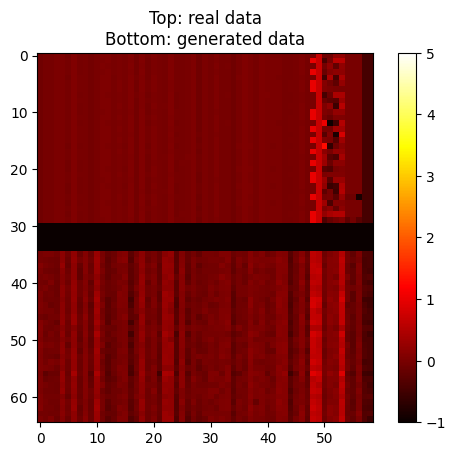

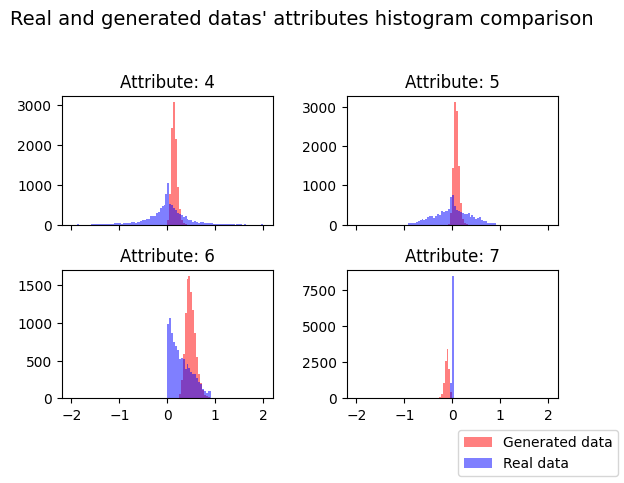

Epoch: 1/20 :: Generator loss: 0.301 :: Discriminator loss: 0.239 :: err kld: 61349.1 :: err wass: 52.5
Deembeder acc: 868/868


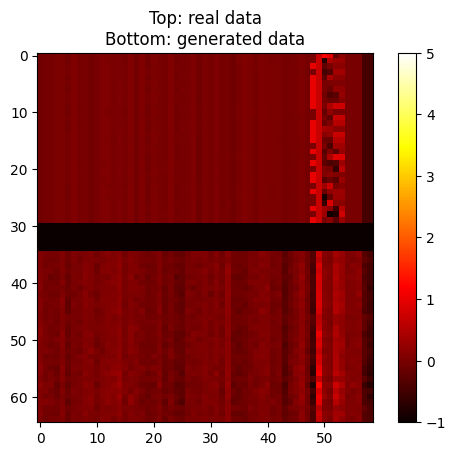

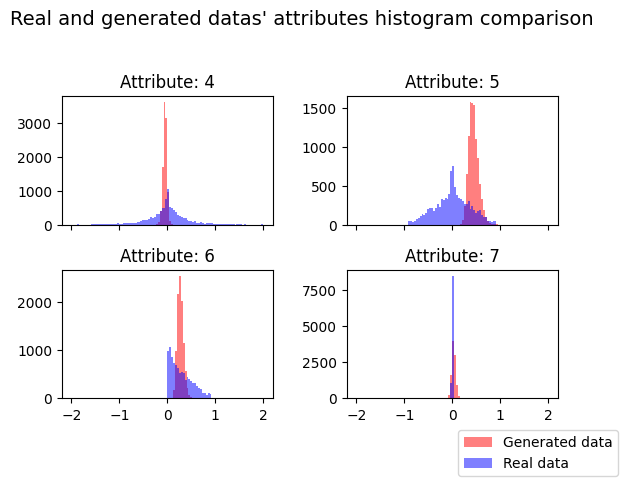

Epoch: 2/20 :: Generator loss: 0.322 :: Discriminator loss: 0.155 :: err kld: 53282.6 :: err wass: 48.1
Deembeder acc: 868/868


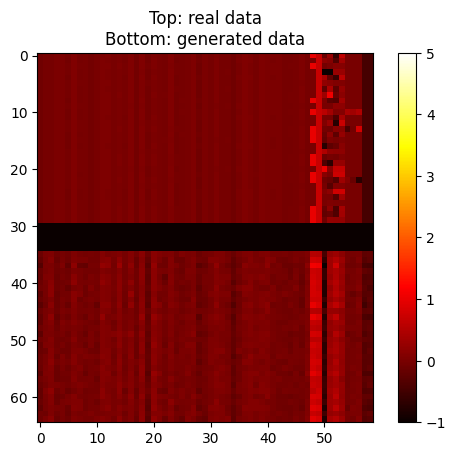

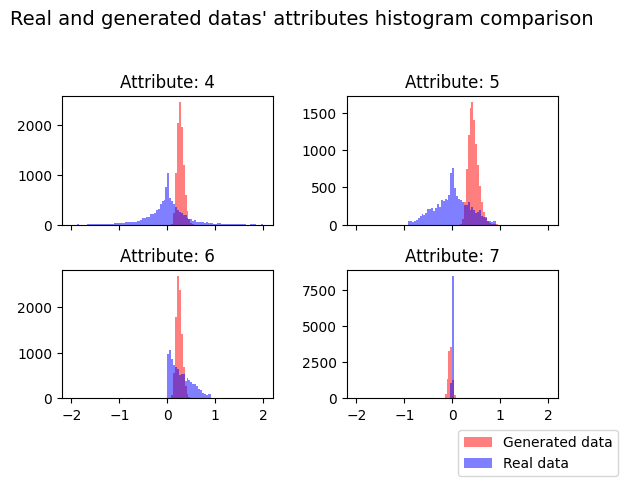

Epoch: 3/20 :: Generator loss: 0.408 :: Discriminator loss: 0.272 :: err kld: 57263.6 :: err wass: 51.8
Deembeder acc: 868/868


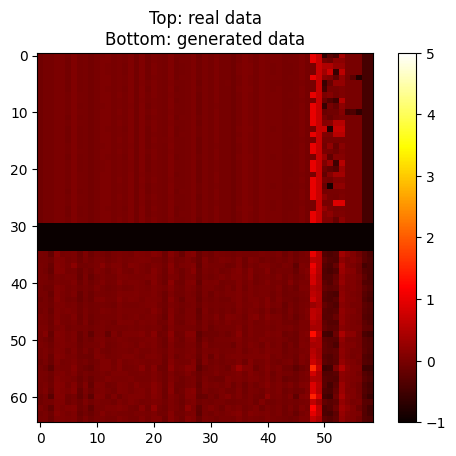

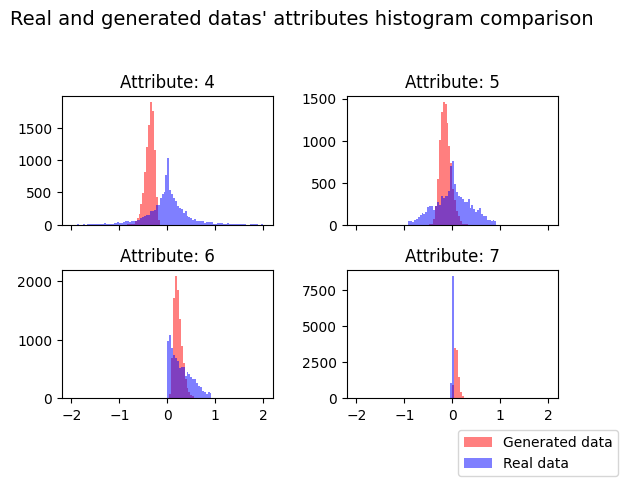

Epoch: 4/20 :: Generator loss: 0.306 :: Discriminator loss: 0.257 :: err kld: 58188.9 :: err wass: 46.5
Deembeder acc: 868/868


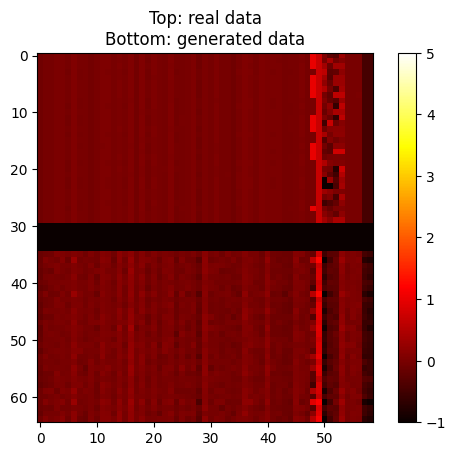

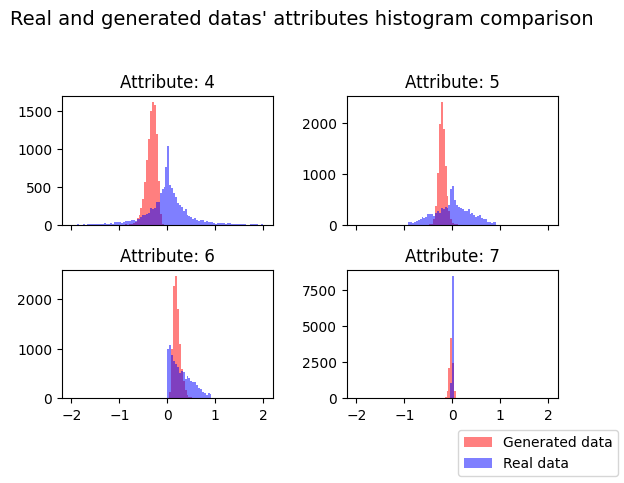

Epoch: 5/20 :: Generator loss: 0.231 :: Discriminator loss: 0.253 :: err kld: 51391.5 :: err wass: 44.8
Deembeder acc: 868/868


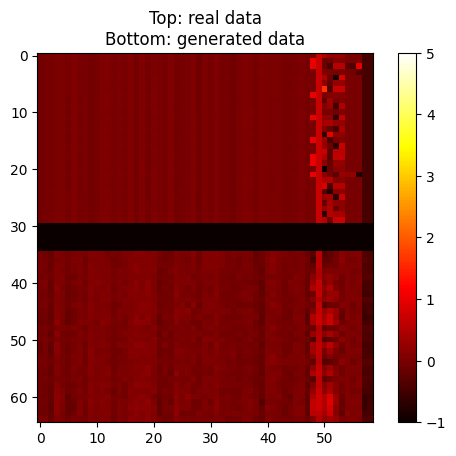

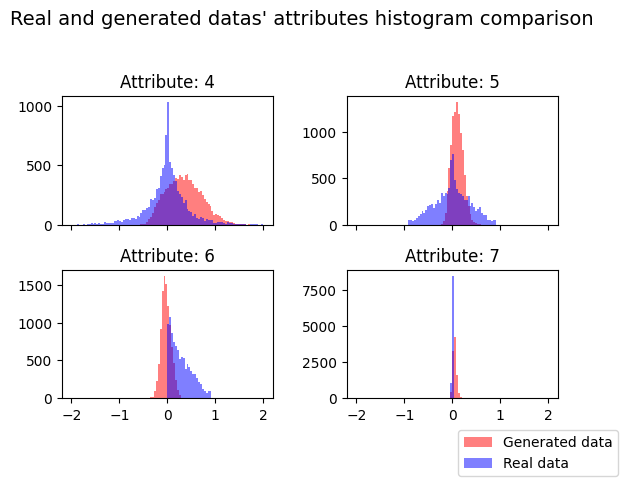

Epoch: 6/20 :: Generator loss: 0.216 :: Discriminator loss: 0.254 :: err kld: 48556.7 :: err wass: 50.5
Deembeder acc: 868/868


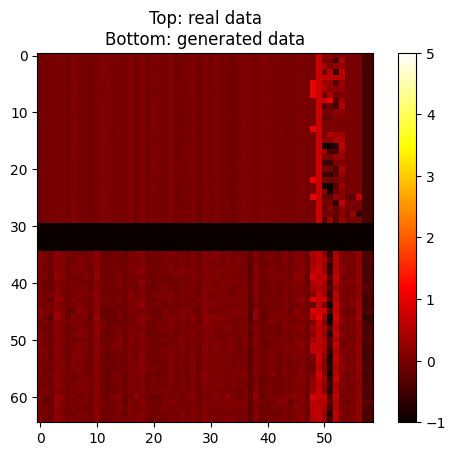

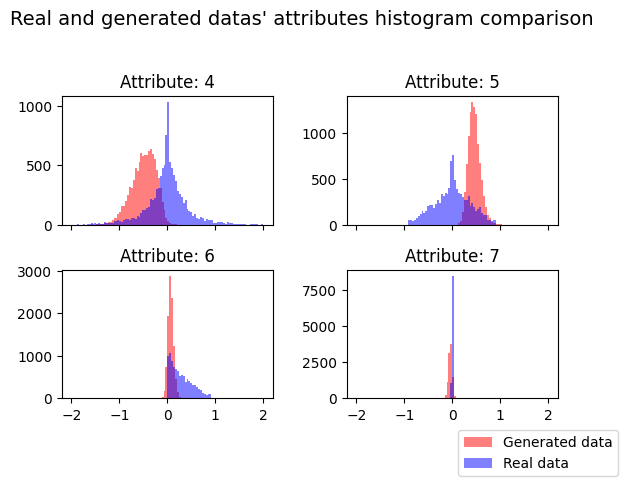

Epoch: 7/20 :: Generator loss: 0.283 :: Discriminator loss: 0.24 :: err kld: 50883.9 :: err wass: 59.2
Deembeder acc: 868/868


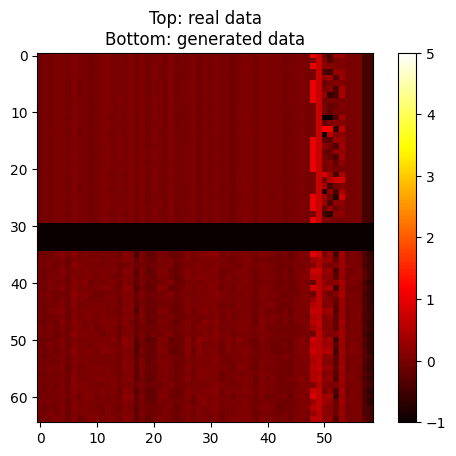

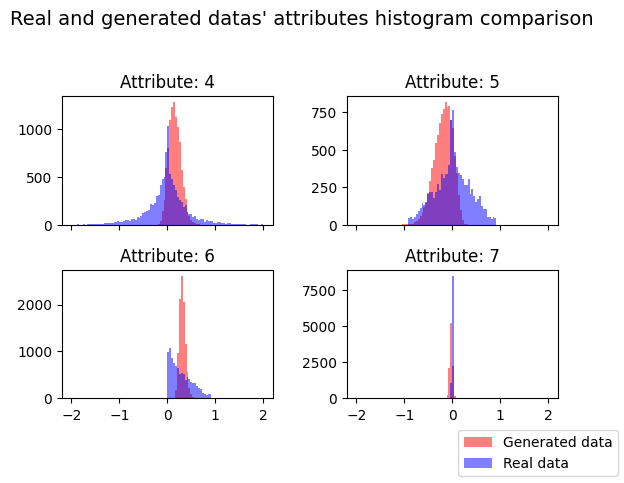

Epoch: 8/20 :: Generator loss: 0.31 :: Discriminator loss: 0.229 :: err kld: 39820.1 :: err wass: 36.0
Deembeder acc: 868/868


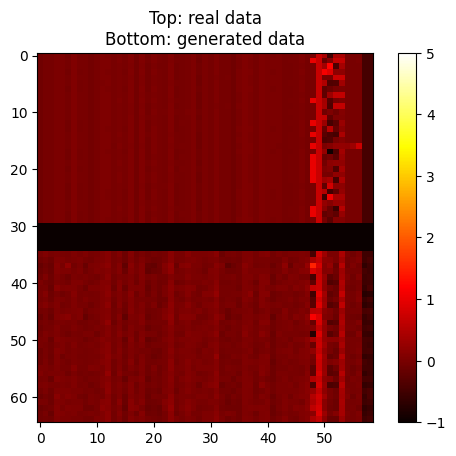

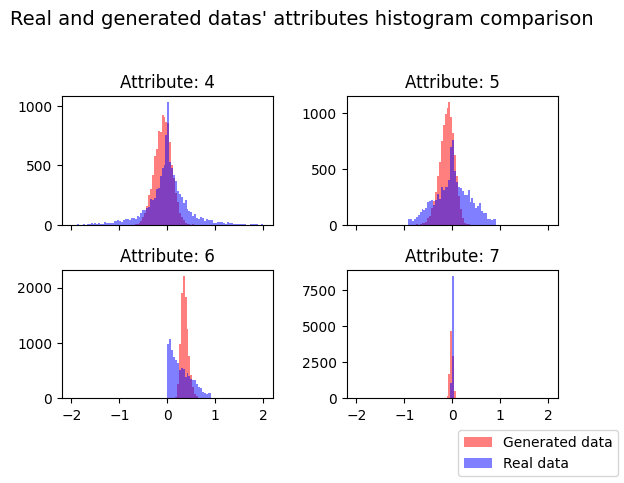

Epoch: 9/20 :: Generator loss: 0.324 :: Discriminator loss: 0.179 :: err kld: 36249.7 :: err wass: 34.9
Deembeder acc: 868/868


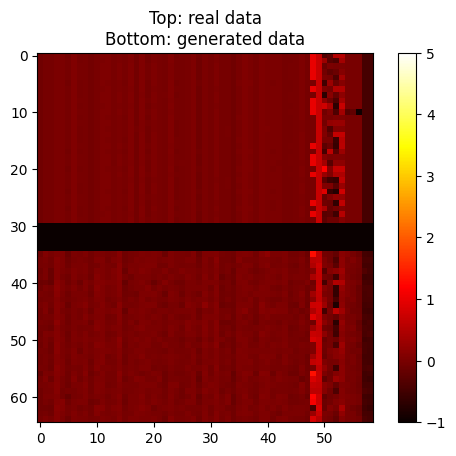

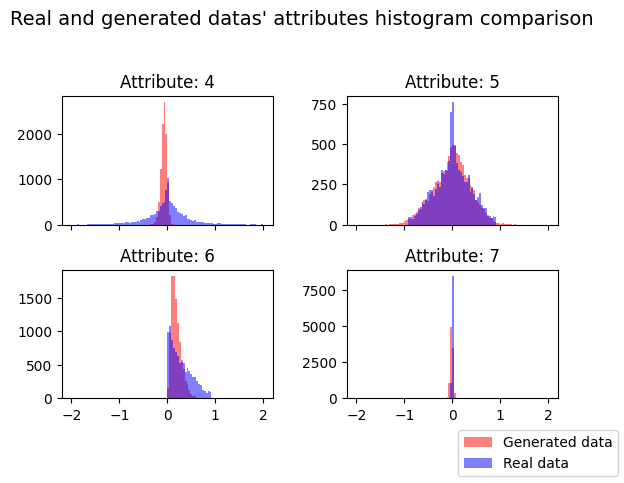

Epoch: 10/20 :: Generator loss: 0.302 :: Discriminator loss: 0.212 :: err kld: 31191.7 :: err wass: 22.3
Deembeder acc: 868/868


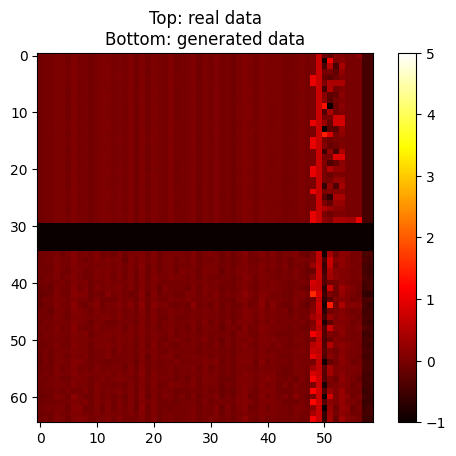

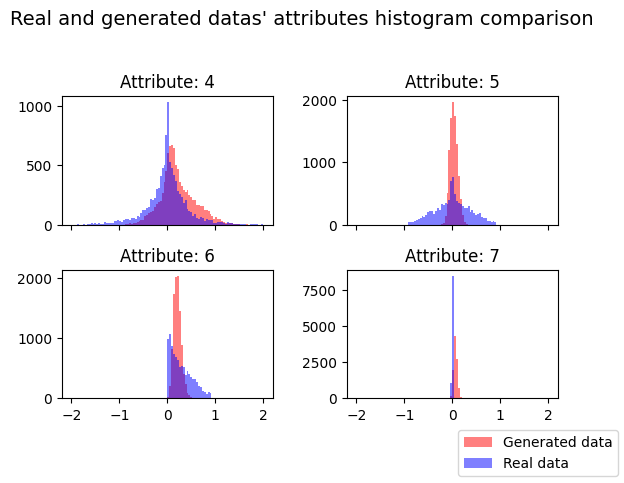

Epoch: 11/20 :: Generator loss: 0.392 :: Discriminator loss: 0.241 :: err kld: 42818.2 :: err wass: 39.6
Deembeder acc: 868/868


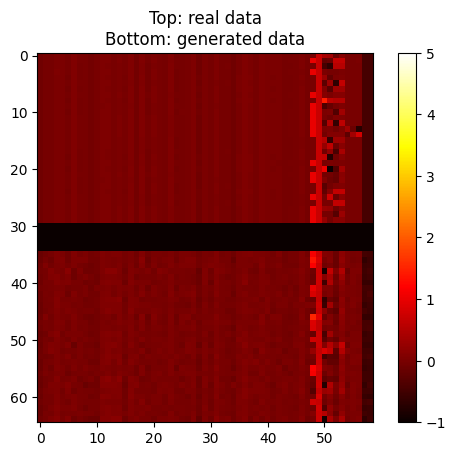

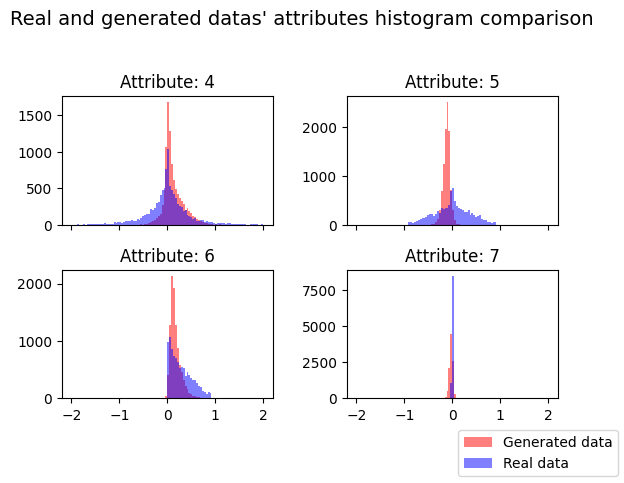

Epoch: 12/20 :: Generator loss: 0.263 :: Discriminator loss: 0.187 :: err kld: 35015.9 :: err wass: 35.2
Deembeder acc: 868/868


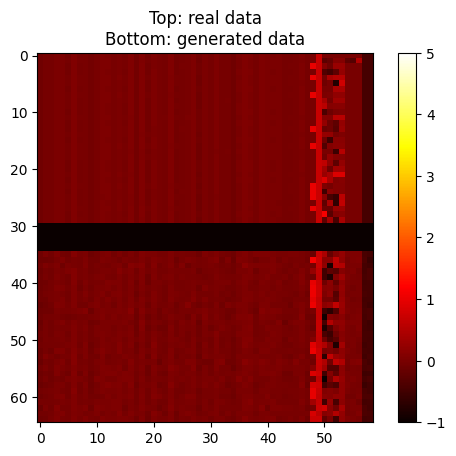

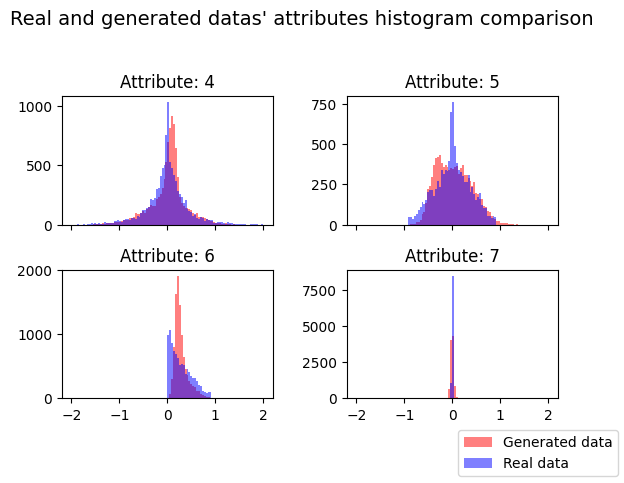

Epoch: 13/20 :: Generator loss: 0.259 :: Discriminator loss: 0.215 :: err kld: 24354.9 :: err wass: 12.8
Deembeder acc: 868/868


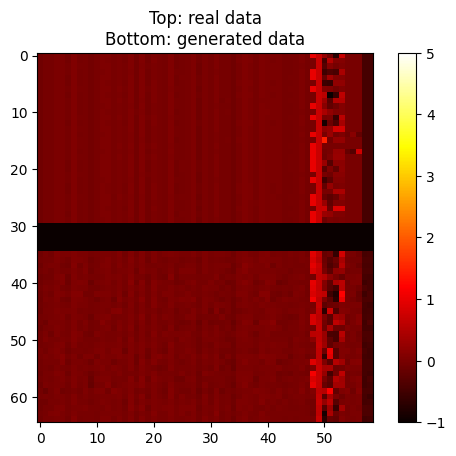

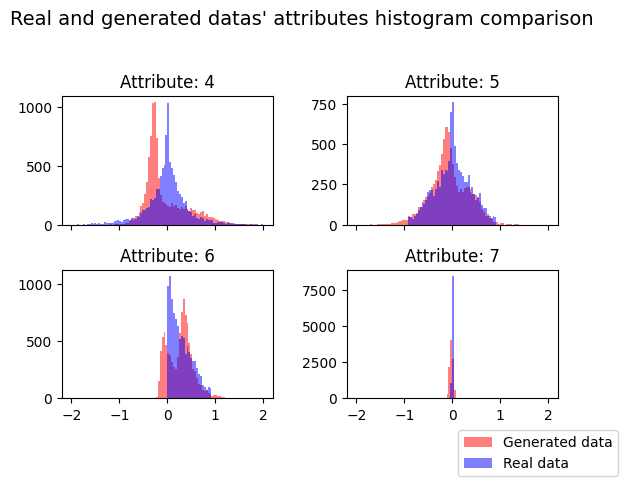

Epoch: 14/20 :: Generator loss: 0.254 :: Discriminator loss: 0.21 :: err kld: 28773.9 :: err wass: 12.5
Deembeder acc: 868/868


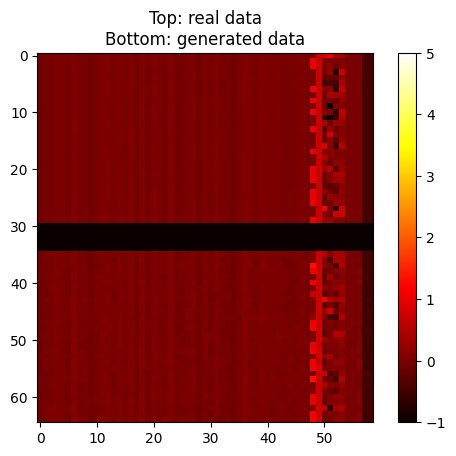

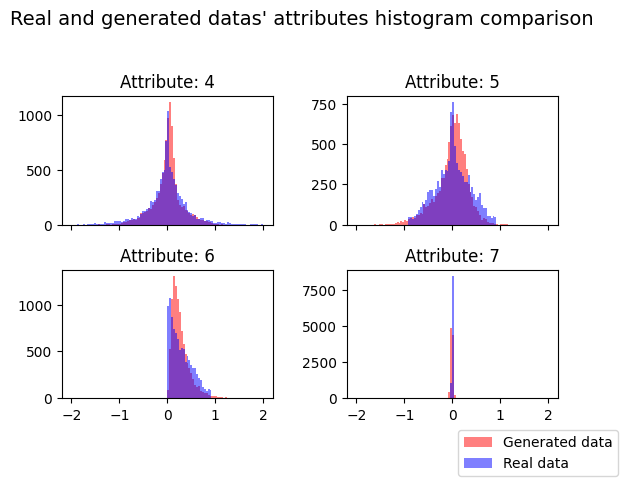

Epoch: 15/20 :: Generator loss: 0.453 :: Discriminator loss: 0.226 :: err kld: 21308.0 :: err wass: 8.8
Deembeder acc: 868/868


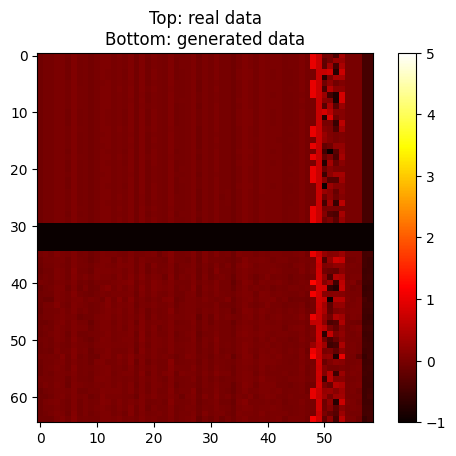

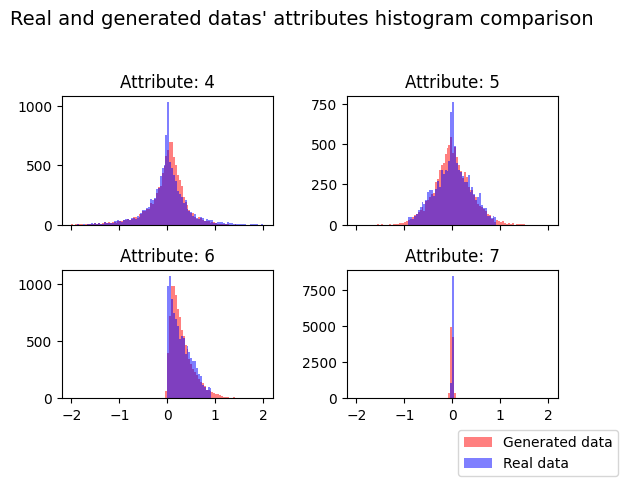

Epoch: 16/20 :: Generator loss: 0.42 :: Discriminator loss: 0.227 :: err kld: 18516.5 :: err wass: 5.2
Deembeder acc: 868/868


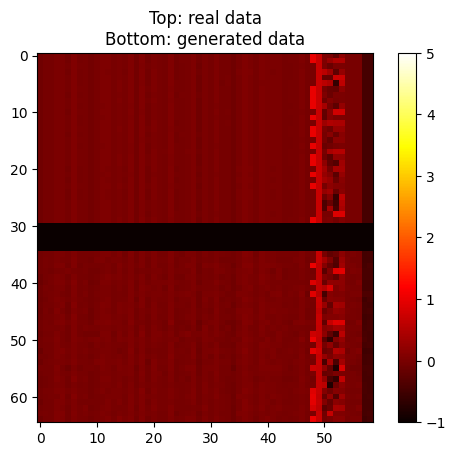

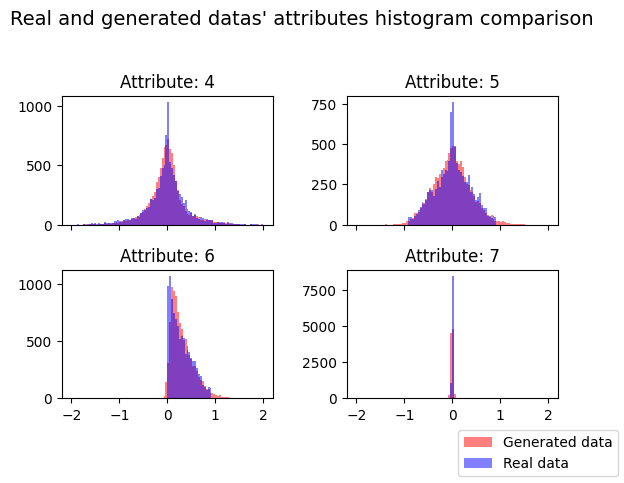

Epoch: 17/20 :: Generator loss: 0.244 :: Discriminator loss: 0.222 :: err kld: 18192.0 :: err wass: 5.1
Deembeder acc: 868/868


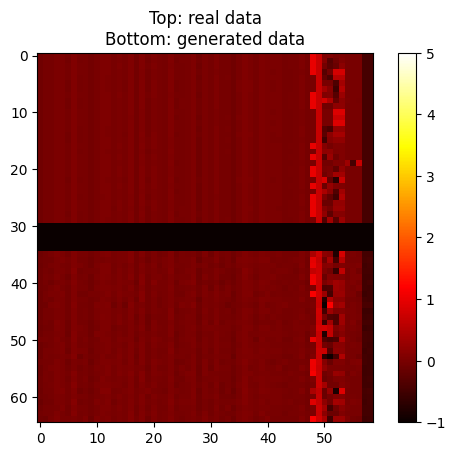

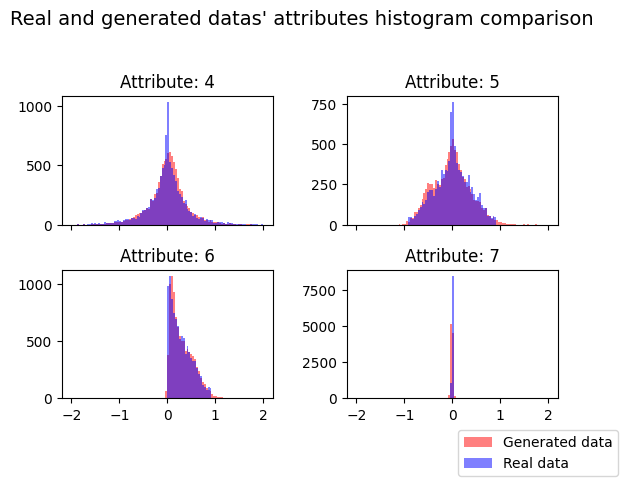

Epoch: 18/20 :: Generator loss: 0.457 :: Discriminator loss: 0.22 :: err kld: 16858.1 :: err wass: 4.8
Deembeder acc: 868/868


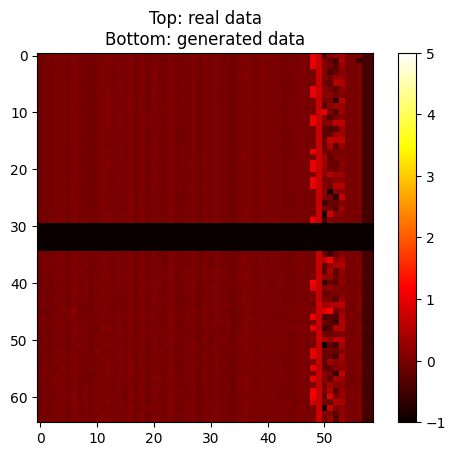

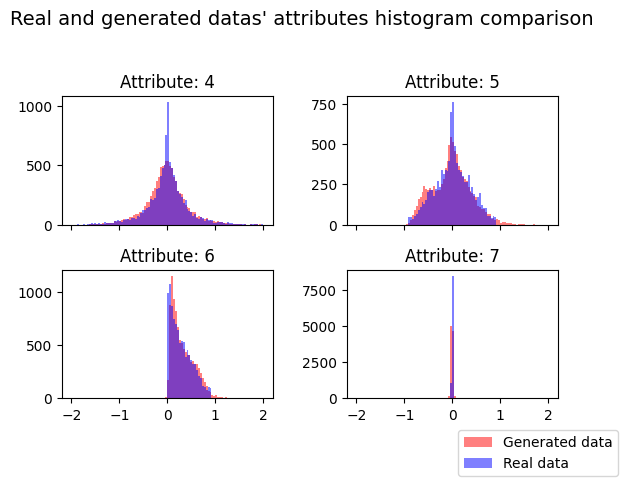

Epoch: 19/20 :: Generator loss: 0.527 :: Discriminator loss: 0.235 :: err kld: 17507.3 :: err wass: 6.4
Deembeder acc: 868/868


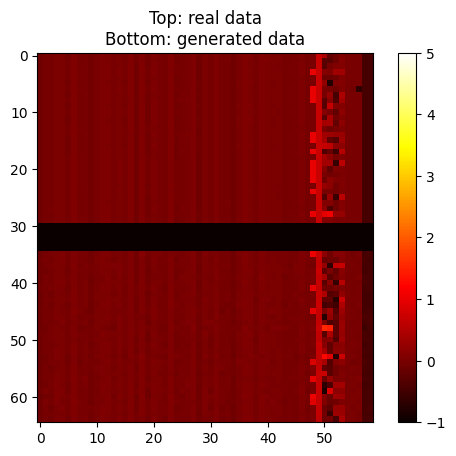

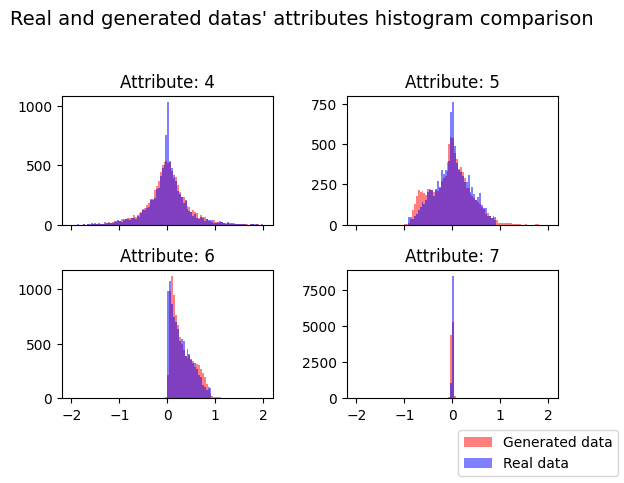

Epoch: 20/20 :: Generator loss: 0.361 :: Discriminator loss: 0.184 :: err kld: 17814.6 :: err wass: 6.4
Deembeder acc: 868/868


In [39]:
for epoch in range(EPOCHS):

    emb_data: torch.Tensor
    gen_data: torch.Tensor 
    gen_loss: Variable
    dis_loss: Variable

    for n_batch, batch in enumerate(train_data_loader):

        real_data: torch.Tensor = batch.to(dtype=dtype, device=device)
        emb_data = embed_data(real_data).detach()

        batch_size = len(batch)

        valid = torch.ones(batch_size, dtype=dtype, device=device, requires_grad=False)
        fake = torch.zeros(batch_size, dtype=dtype, device=device, requires_grad=False)

        # ======== Train Generator ======== #
        gen_optim.zero_grad()

        # Sample noise as generator input
        lat_fake = torch.randn(batch_size, PRTCL_LATENT_SPACE_SIZE, device=device, dtype=dtype)

        # Generate a batch of images
        gen_data = generator(lat_fake)

        # Loss measures generator's ability to fool the discriminator
        gen_loss = criterion(valid, discriminator(gen_data))

        gen_loss.backward()
        gen_optim.step()

        # ======== Train Discriminator ======== #
        dis_optim.zero_grad()

        real_loss = criterion(valid, discriminator(emb_data))
        fake_loss = criterion(fake, discriminator(gen_data.detach()))
        dis_loss = (real_loss + fake_loss) / 2

        dis_loss.backward()
        dis_optim.step()

        train_deembeder(epochs=2)

    # Evaluate
    show_heatmaps(emb_data, gen_data)
    err_kld, err_wass = gen_show_comp_hists(
        generator,
        X,
        attr_idxs=[FEATURES - 8, FEATURES - 7, FEATURES - 6, FEATURES - 5],
        emb=False,
    )

    print(
        f'Epoch: {epoch + 1}/{EPOCHS} :: '
        f'Generator loss: {round(gen_loss.item(), 3)} :: '
        f'Discriminator loss: {round(dis_loss.item(), 3)} :: '
        f'err kld: {round(err_kld, 1)} :: '
        f'err wass: {round(err_wass, 1)}'
    )
    print_deemb_quality(torch.arange(N_PARTICLES, device=device))


## Wasserstein GAN (WGAN) generator

In [40]:
from torch import autograd

EPOCHS = 20
BATCH_SIZE = 8*1024
LR = 5e-5
CRITIC_ITERATIONS = 2
LAMBDA = 1

train_data_loader = DataLoader(X_train, batch_size=BATCH_SIZE, shuffle=True)
test_data_loader = DataLoader(X_test, batch_size=BATCH_SIZE, shuffle=True)

generator = PrtclGANGenerator(
    emb_features=EMB_FEATURES,
    latent_size=PRTCL_LATENT_SPACE_SIZE,
).to(dtype=dtype, device=device)

discriminator = PrtclGANDiscriminator(
    emb_features=EMB_FEATURES,
).to(dtype=dtype, device=device)

gen_optim = torch.optim.Adam(generator.parameters(), lr=LR, betas=(0, .9))
dis_optim = torch.optim.Adam(discriminator.parameters(), lr=LR, betas=(0, .9))

def gradient_penalty(real_data: torch.Tensor, gen_data: torch.Tensor):
    alpha = torch.rand(len(real_data), 1).expand(real_data.size()).to(dtype=dtype, device=device)

    interpolates = (alpha * real_data + ((1 - alpha) * gen_data)).to(dtype=dtype, device=device)
    interpolates = autograd.Variable(interpolates, requires_grad=True)

    disc_interpolates = discriminator(interpolates)

    gradients = autograd.grad(
        outputs=disc_interpolates, 
        inputs=interpolates,
        grad_outputs=torch.ones(disc_interpolates.size(), dtype=dtype, device=device),
        create_graph=True, 
        retain_graph=True, 
        only_inputs=True
    )[0]

    return ((gradients.norm(2, dim=1) - 1) ** 2).mean()

def criterion(real_data: torch.Tensor, gen_data: torch.Tensor) -> Variable:
    critic_real = discriminator(real_data)
    critic_fake = discriminator(gen_data.detach())
    critic_loss = -(torch.mean(critic_real) - torch.mean(critic_fake))
    return critic_loss + LAMBDA*gradient_penalty(real_data, gen_data)

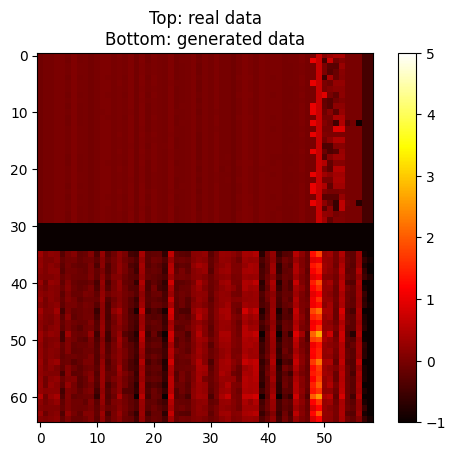

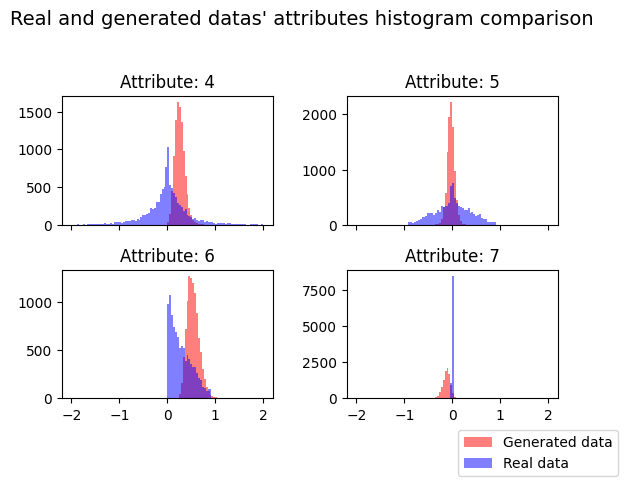

Epoch: 1/20 :: Generator loss: -0.944 :: Critic loss: 0.564 :: err kld: 52246.5 :: err wass: 49.0
Deembeder acc: 868/868


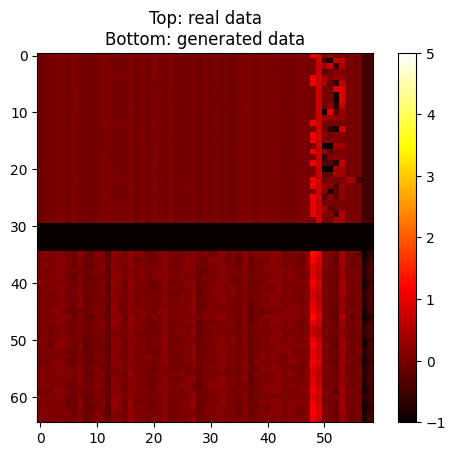

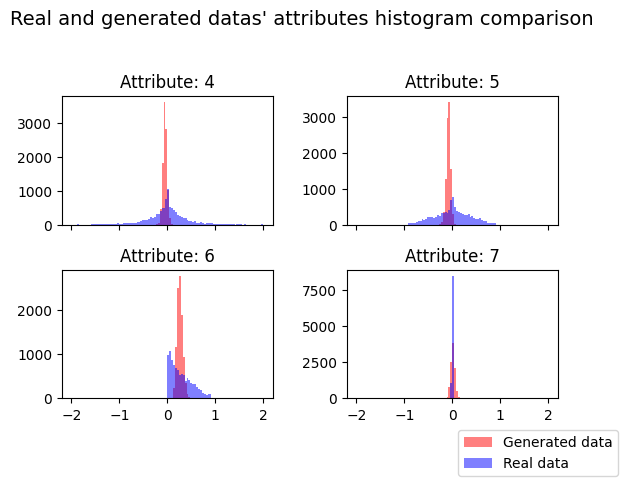

Epoch: 2/20 :: Generator loss: -0.313 :: Critic loss: -0.181 :: err kld: 51014.7 :: err wass: 40.6
Deembeder acc: 868/868


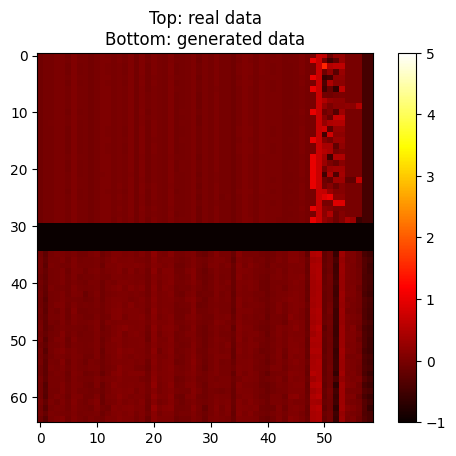

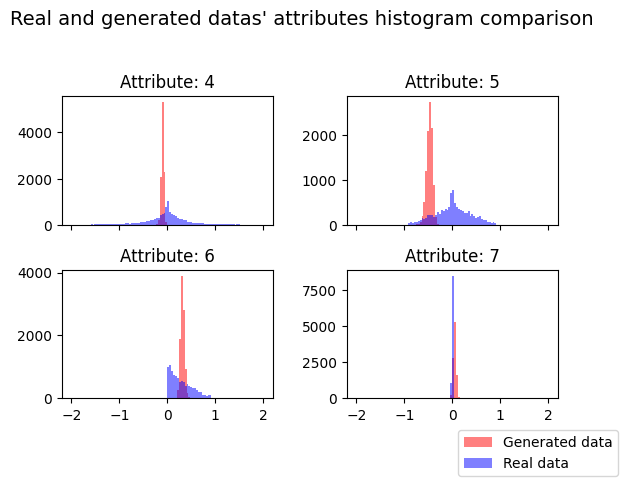

Epoch: 3/20 :: Generator loss: -0.363 :: Critic loss: -0.155 :: err kld: 68073.2 :: err wass: 58.3
Deembeder acc: 868/868


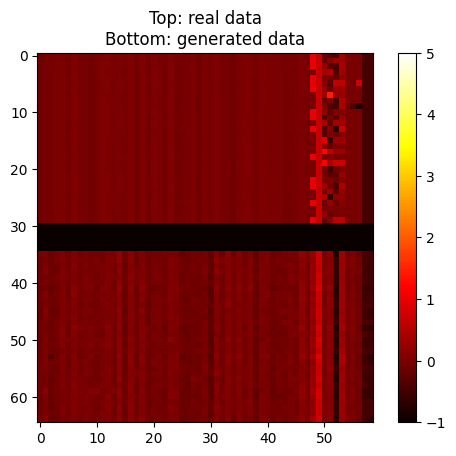

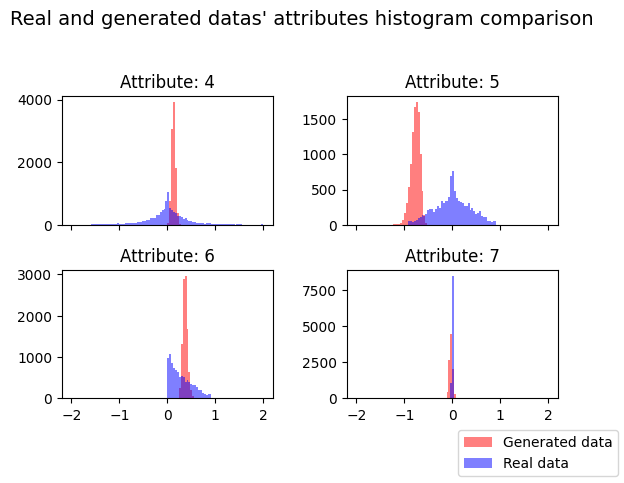

Epoch: 4/20 :: Generator loss: -0.405 :: Critic loss: -0.298 :: err kld: 63826.0 :: err wass: 65.7
Deembeder acc: 868/868


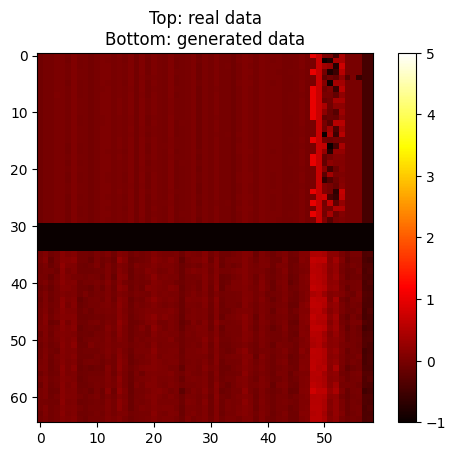

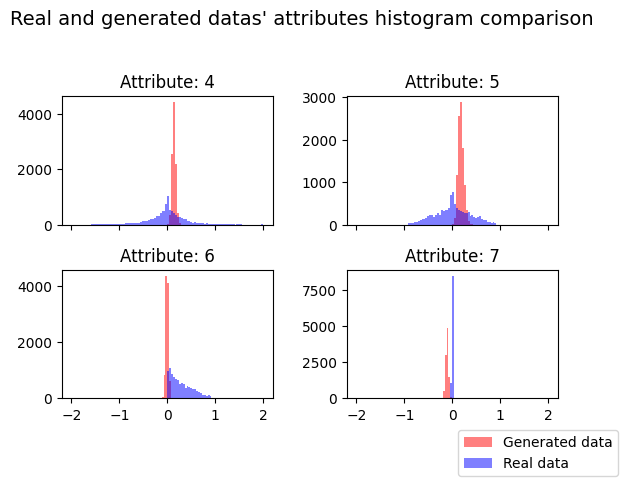

Epoch: 5/20 :: Generator loss: -0.337 :: Critic loss: -0.413 :: err kld: 82456.6 :: err wass: 62.2
Deembeder acc: 868/868


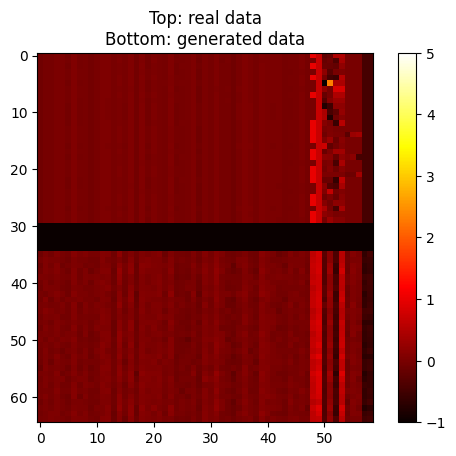

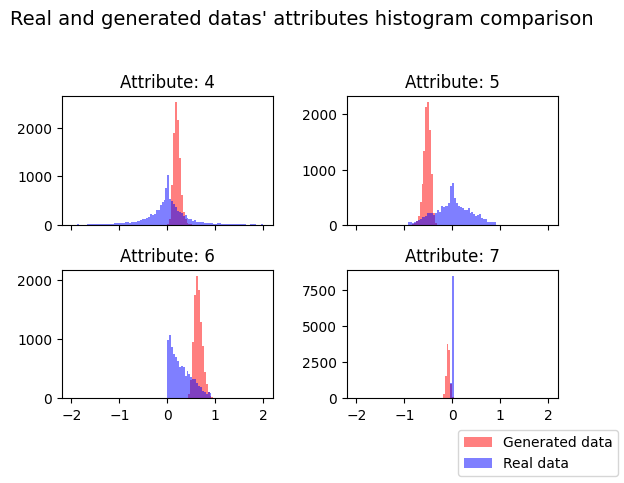

Epoch: 6/20 :: Generator loss: -0.463 :: Critic loss: -0.214 :: err kld: 69090.4 :: err wass: 76.0
Deembeder acc: 868/868


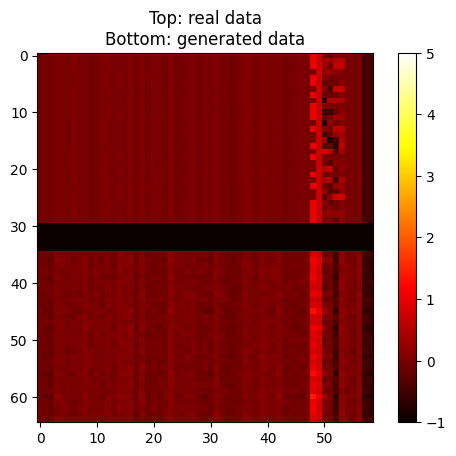

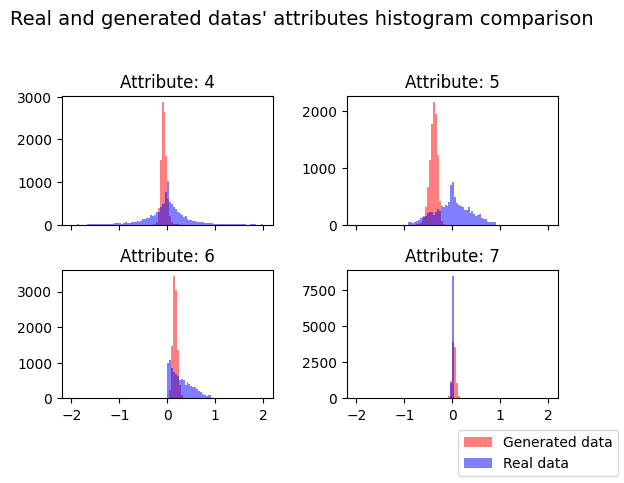

Epoch: 7/20 :: Generator loss: -0.431 :: Critic loss: -0.245 :: err kld: 53270.3 :: err wass: 52.7
Deembeder acc: 868/868


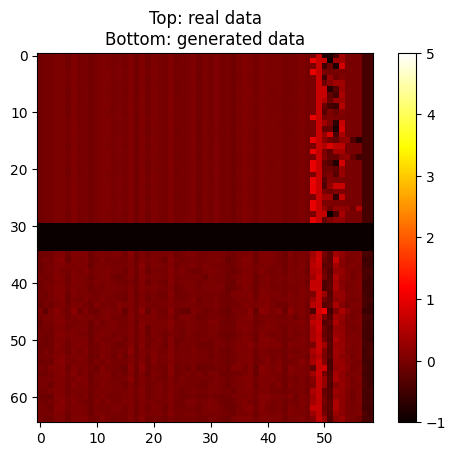

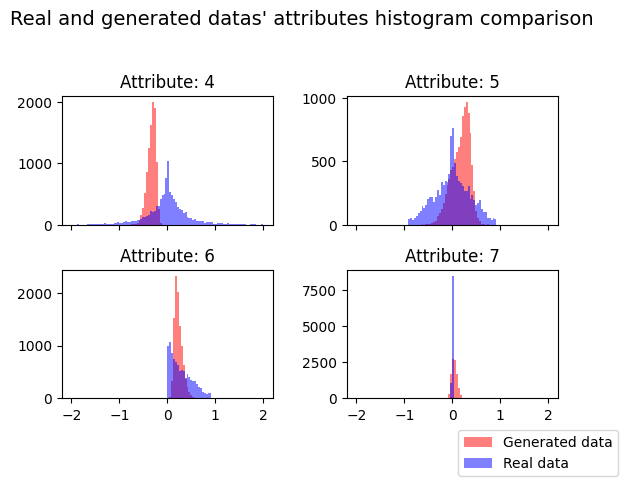

Epoch: 8/20 :: Generator loss: -0.415 :: Critic loss: -0.235 :: err kld: 46790.2 :: err wass: 41.2
Deembeder acc: 868/868


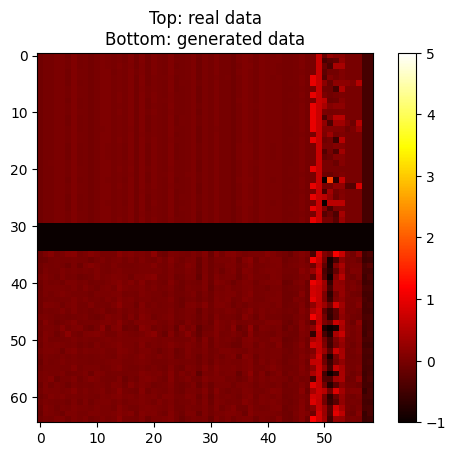

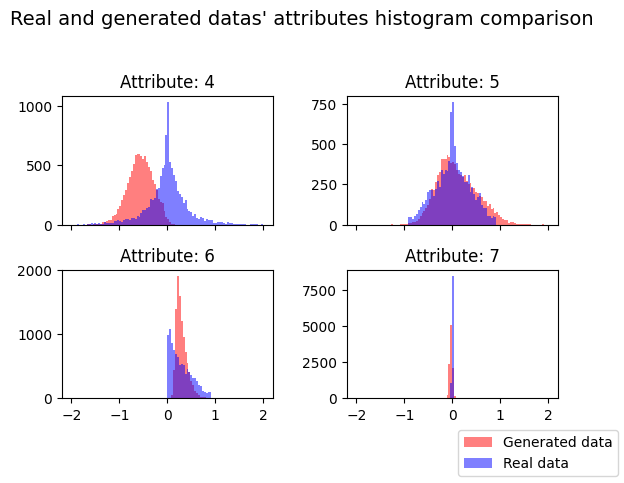

Epoch: 9/20 :: Generator loss: -0.448 :: Critic loss: -0.227 :: err kld: 36262.0 :: err wass: 29.8
Deembeder acc: 868/868


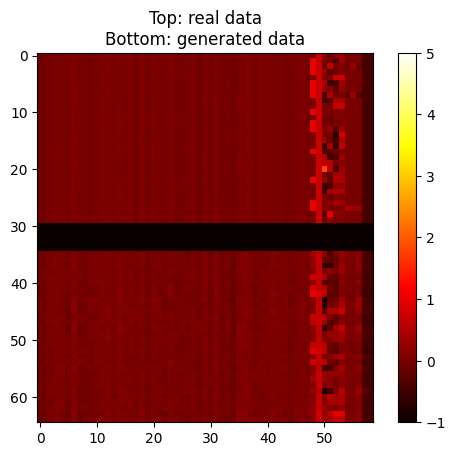

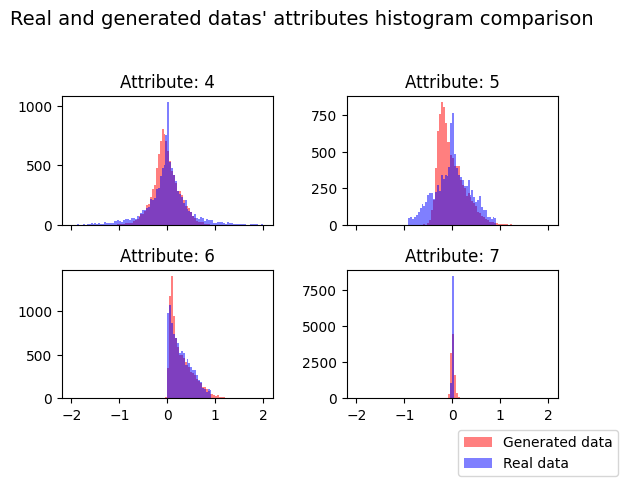

Epoch: 10/20 :: Generator loss: -0.475 :: Critic loss: -0.204 :: err kld: 22659.2 :: err wass: 12.3
Deembeder acc: 868/868


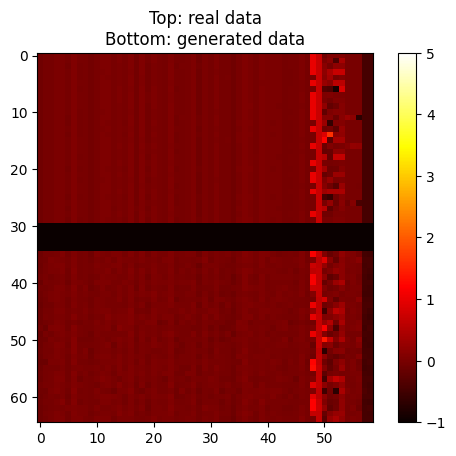

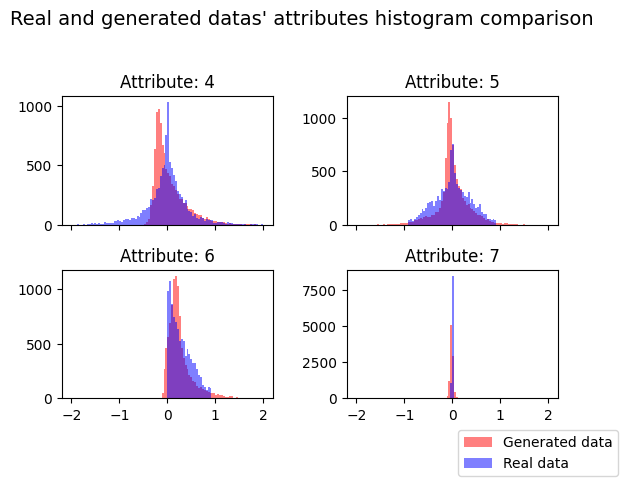

Epoch: 11/20 :: Generator loss: -0.506 :: Critic loss: -0.091 :: err kld: 24498.4 :: err wass: 9.9
Deembeder acc: 868/868


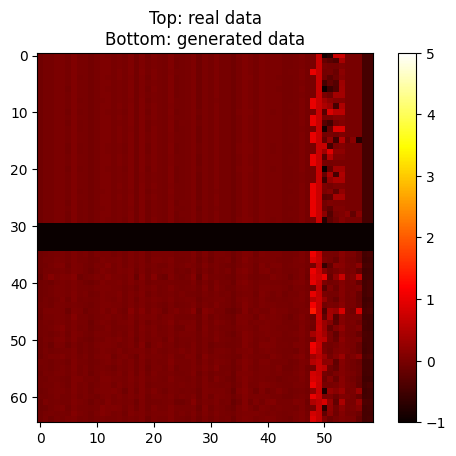

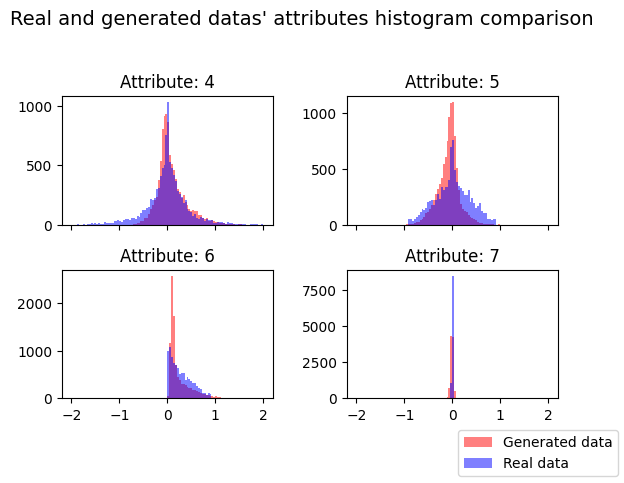

Epoch: 12/20 :: Generator loss: -0.474 :: Critic loss: -0.166 :: err kld: 24079.9 :: err wass: 13.9
Deembeder acc: 868/868


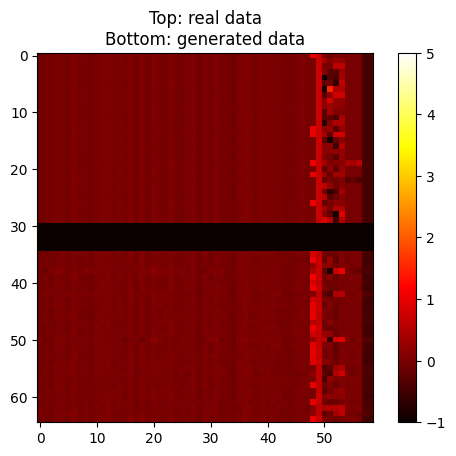

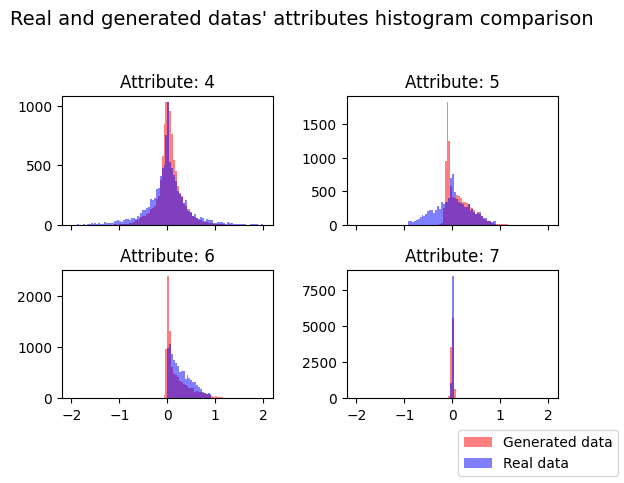

Epoch: 13/20 :: Generator loss: -0.424 :: Critic loss: -0.188 :: err kld: 27165.8 :: err wass: 15.1
Deembeder acc: 868/868


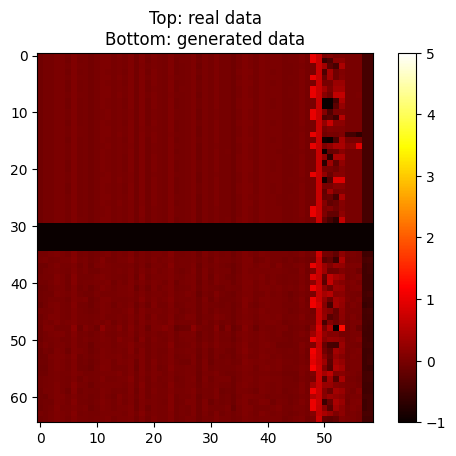

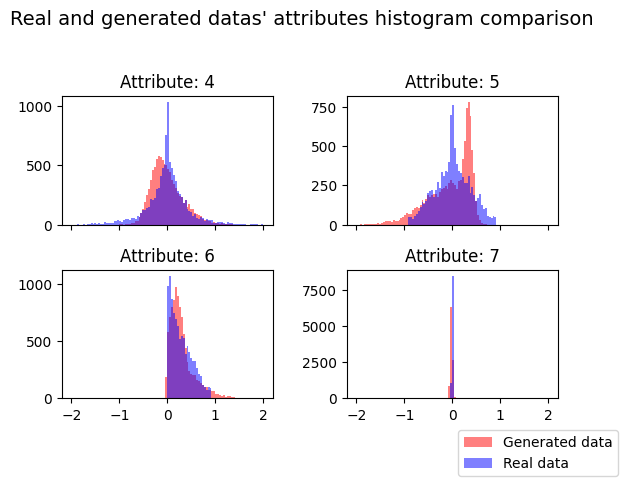

Epoch: 14/20 :: Generator loss: -0.496 :: Critic loss: -0.134 :: err kld: 22888.8 :: err wass: 9.6
Deembeder acc: 868/868


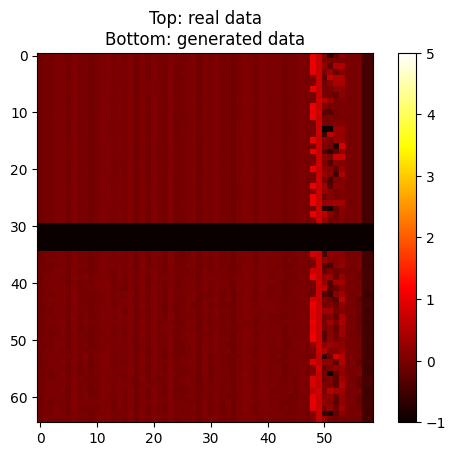

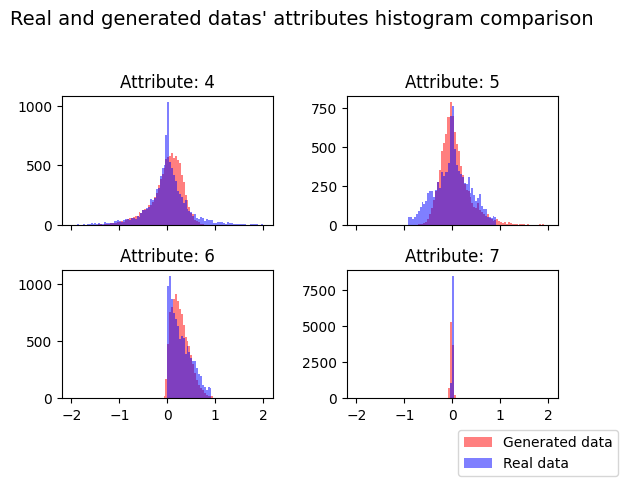

Epoch: 15/20 :: Generator loss: -0.473 :: Critic loss: -0.15 :: err kld: 21067.1 :: err wass: 9.6
Deembeder acc: 868/868


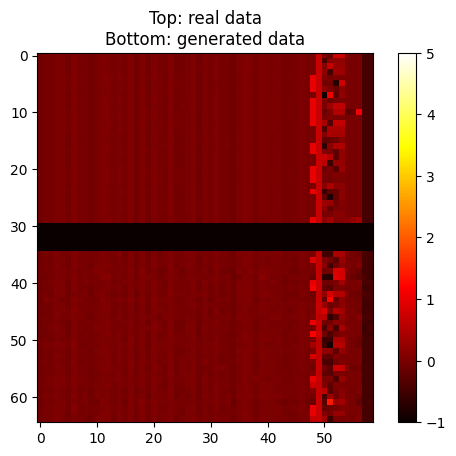

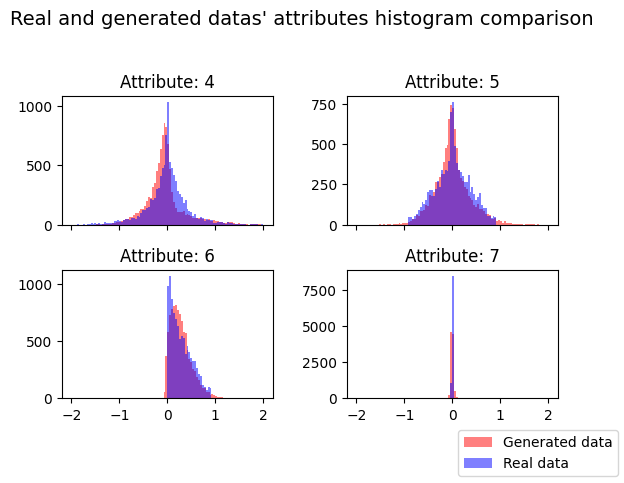

Epoch: 16/20 :: Generator loss: -0.531 :: Critic loss: -0.076 :: err kld: 19892.3 :: err wass: 6.7
Deembeder acc: 868/868


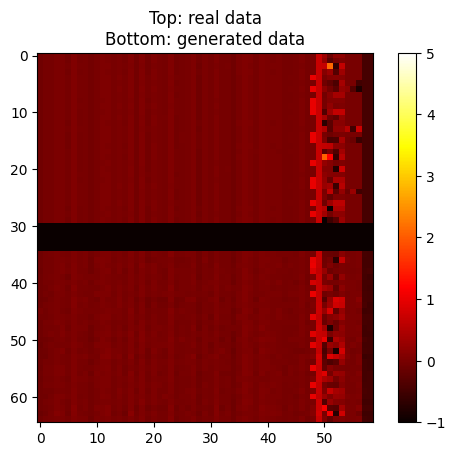

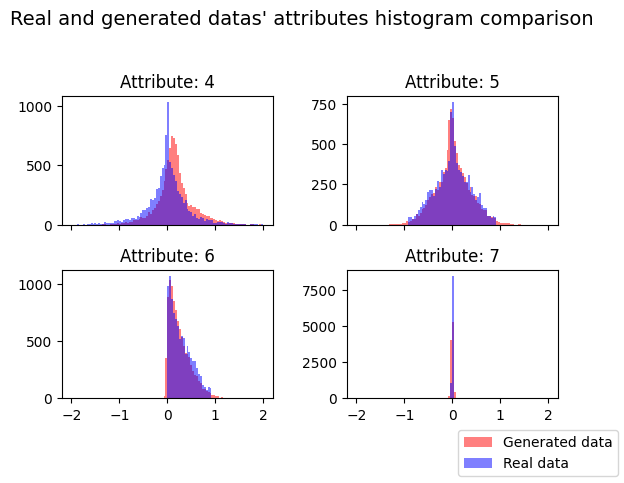

Epoch: 17/20 :: Generator loss: -0.472 :: Critic loss: -0.064 :: err kld: 19668.6 :: err wass: 9.3
Deembeder acc: 868/868


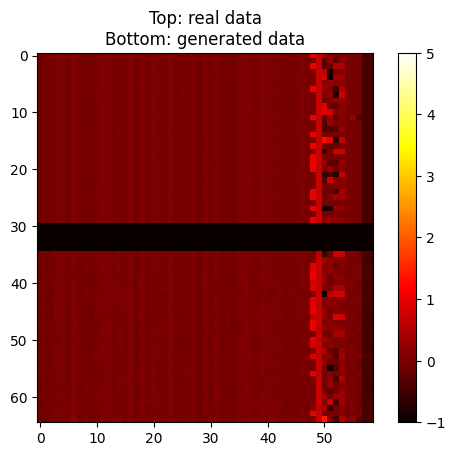

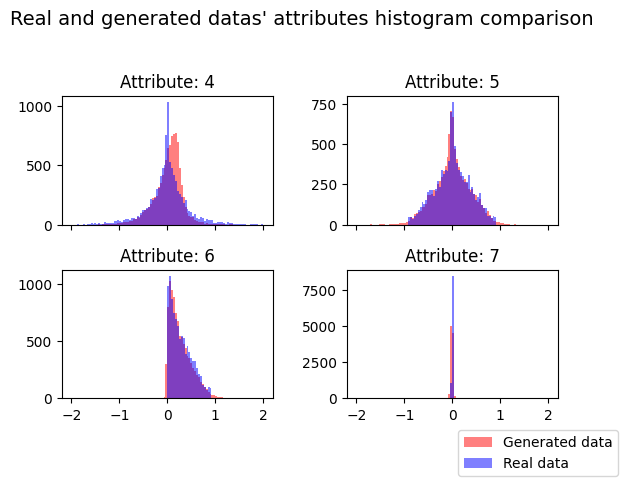

Epoch: 18/20 :: Generator loss: -0.452 :: Critic loss: -0.074 :: err kld: 17898.9 :: err wass: 6.1
Deembeder acc: 868/868


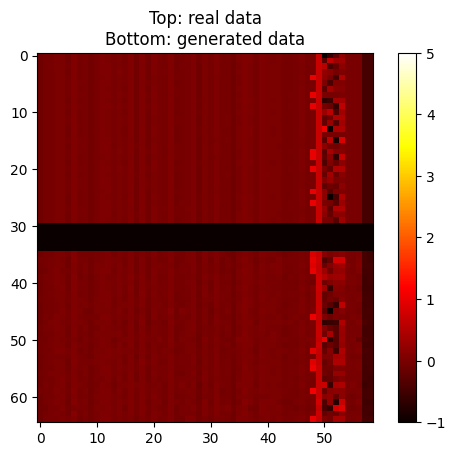

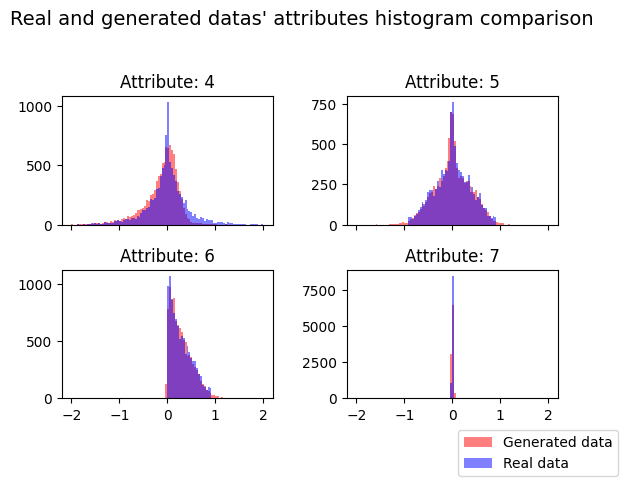

Epoch: 19/20 :: Generator loss: -0.469 :: Critic loss: -0.078 :: err kld: 19167.2 :: err wass: 5.5
Deembeder acc: 868/868


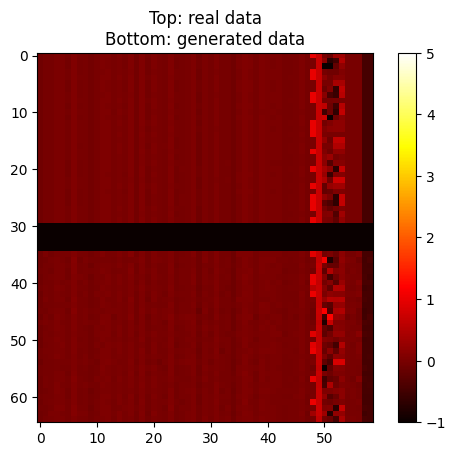

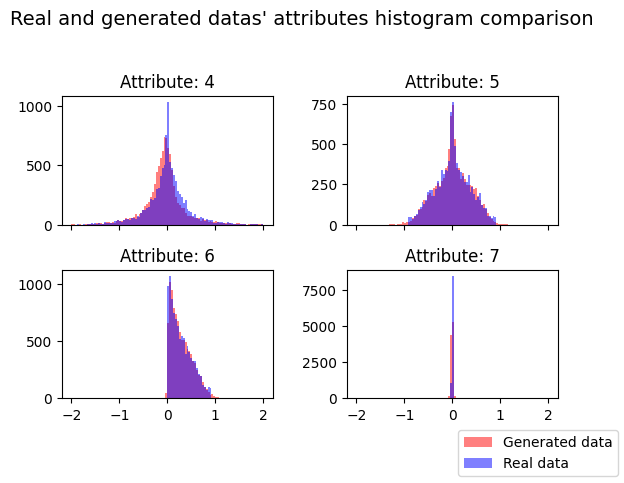

Epoch: 20/20 :: Generator loss: -0.525 :: Critic loss: -0.04 :: err kld: 17344.9 :: err wass: 4.2
Deembeder acc: 868/868


In [41]:
for epoch in range(EPOCHS):

    emb_data: torch.Tensor
    gen_data: torch.Tensor 
    gen_loss: Variable
    dis_loss: Variable

    for n_batch, batch in enumerate(train_data_loader):

        real_data: torch.Tensor = batch.to(dtype=dtype, device=device)
        emb_data = embed_data(real_data).detach()

        # ======== Train Generator ======== #

        gen_optim.zero_grad()

        for p in discriminator.parameters():
            p.requires_grad = False  # to avoid computation

        # Sample noise as generator input
        lat_fake = torch.randn(len(batch), PRTCL_LATENT_SPACE_SIZE, dtype=dtype, device=device)
        gen_data = generator(lat_fake)

        output = discriminator(gen_data)
        gen_loss = -torch.mean(output)

        gen_loss.backward()
        gen_optim.step()

        for p in discriminator.parameters():
            p.requires_grad = True  # to avoid computation

        # ======== Train Discriminator ======== #
        for _ in range(CRITIC_ITERATIONS):
            loss = criterion(emb_data, gen_data)

            loss.backward()
            dis_optim.step()

            dis_optim.zero_grad()

        train_deembeder(epochs=2)

    # Evaluate
    show_heatmaps(emb_data, gen_data)
    err_kld, err_wass = gen_show_comp_hists(
        generator,
        X,
        attr_idxs=[FEATURES - 8, FEATURES - 7, FEATURES - 6, FEATURES - 5],
        emb=False,
    )

    print(
        f'Epoch: {epoch + 1}/{EPOCHS} :: '
        f'Generator loss: {round(gen_loss.item(), 3)} :: '
        f'Critic loss: {round(loss.item(), 3)} :: '
        f'err kld: {round(err_kld, 1)} :: '
        f'err wass: {round(err_wass, 1)}'
    )
    print_deemb_quality(torch.arange(N_PARTICLES, device=device))


## Further work

Further research might be conducted on generating entire collision events (with numerous particles) instead of generating events on a per-particle basis.